# Preset Before Starting Data Understanding, Data Preparation and Modelling

## Install and Import Required Library

In [ ]:
!pip install imbalanced-learn

In [ ]:
!pip install scikit-learn

In [ ]:
print(sklearn.__version__)

In [ ]:
!pip3 install xgboost

In [ ]:
import xgboost as xgb

In [ ]:
!pip3 install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 84 kB/s 


In [ ]:
import catboost as catb

## Import Required Libraries

In [ ]:
import pandas as pd                # For Data Manipulation and Analysis
import numpy as np                 # For Mathematical Operations on Arrays
import seaborn as sns              # For Data Visualisation
import matplotlib.pyplot as plt    # For Graphical Plotting
import sklearn as sklearn          # For Machine Learning and Statistical Modelling
import imblearn as imblearn        # For Dealing with Imbalanced Class in Classification
import warnings                    # To ignore any warnings
warnings.filterwarnings("ignore")

## Import Dataset

In [ ]:
# Read the csv file
# Put 'r' before the path string to address any special characters in the path such as '\'
data = pd.read_csv ('/content/online_shoppers_intention.csv')
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


# Initial Data Exploration

In [ ]:
data.shape

(12330, 18)

In [ ]:
data.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Check Missing Values

In [ ]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

# Exploratory Data Analysis (EDA)

## Descriptive Statistical Summary

In [ ]:
# Only for Numerical Variables
data.describe()

# Compare mean & std
# if MEAN > STD, then the VAR(s) has NO OUTLIERS
# Else, the VAR has OULIERS

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [ ]:
from statistics import mode
print(data.mode())

   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                      0.0   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0          0.0        0.2         0.0         0.0   May                 2   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        2       1            2  Returning_Visitor    False    False  


In [ ]:
from statistics import median
print(data.median())

Administrative               1.000000
Administrative_Duration      7.500000
Informational                0.000000
Informational_Duration       0.000000
ProductRelated              18.000000
ProductRelated_Duration    598.936905
BounceRates                  0.003112
ExitRates                    0.025156
PageValues                   0.000000
SpecialDay                   0.000000
OperatingSystems             2.000000
Browser                      2.000000
Region                       3.000000
TrafficType                  2.000000
Weekend                      0.000000
Revenue                      0.000000
dtype: float64


In [ ]:
data.skew()

Administrative             1.960357
Administrative_Duration    5.615719
Informational              4.036464
Informational_Duration     7.579185
ProductRelated             4.341516
ProductRelated_Duration    7.263228
BounceRates                2.947855
ExitRates                  2.148789
PageValues                 6.382964
SpecialDay                 3.302667
OperatingSystems           2.066285
Browser                    3.242350
Region                     0.983549
TrafficType                1.962987
Weekend                    1.265962
Revenue                    1.909509
dtype: float64

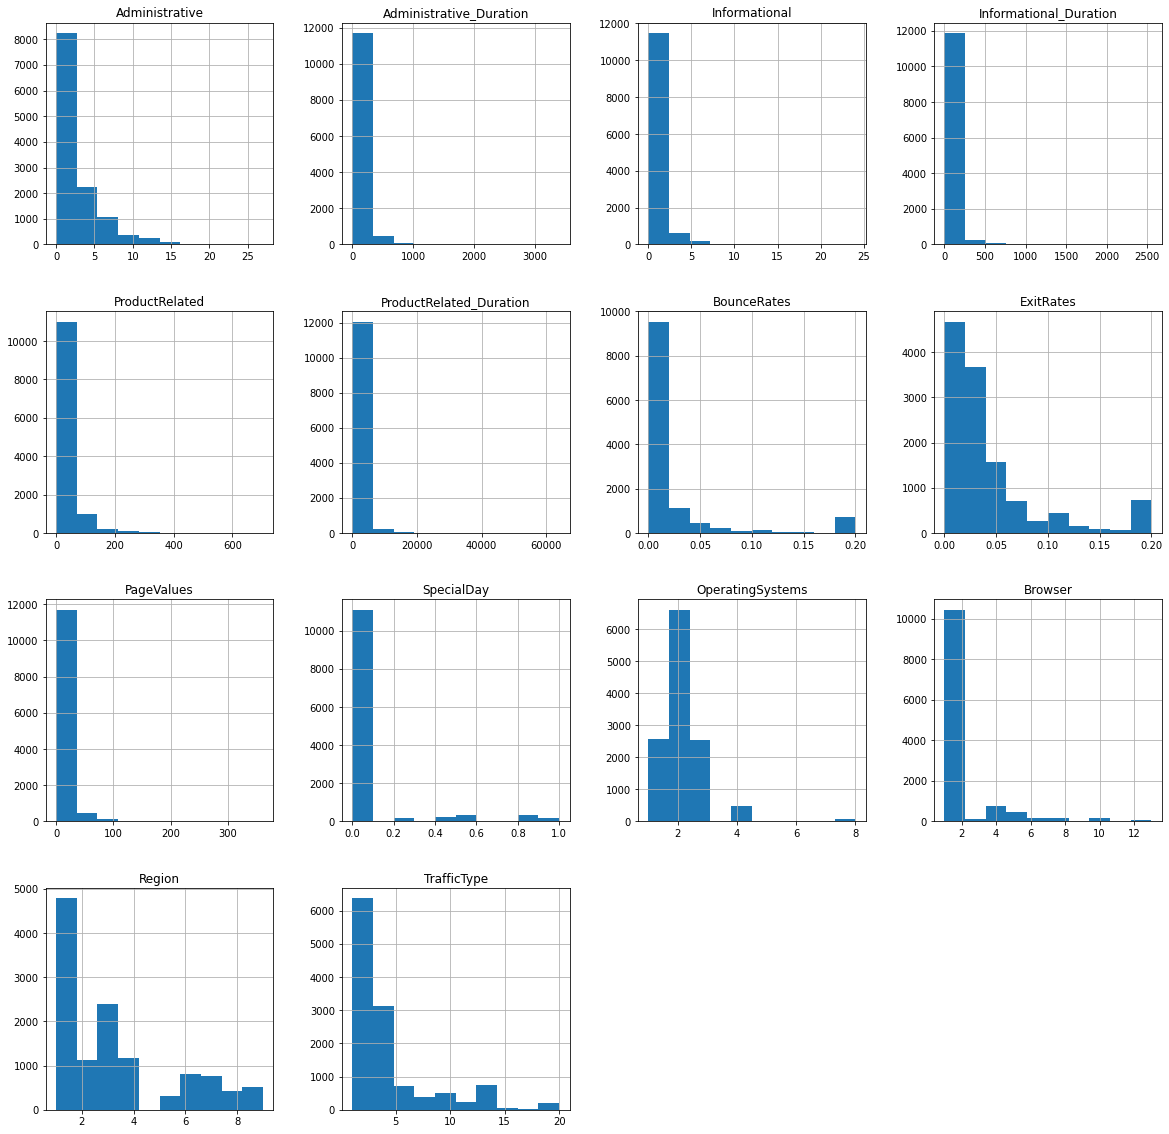

<Figure size 1440x1440 with 0 Axes>

In [ ]:
data.hist()
plt.figure(figsize=(20, 20))
plt.show()

Data Correlation

In [ ]:
data.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.006347,-0.025035,-0.005487,-0.033561,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,-0.007343,-0.015392,-0.005561,-0.014376,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.009527,-0.038235,-0.029169,-0.034491,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.009579,-0.019285,-0.027144,-0.024675,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.004290,-0.013146,-0.038122,-0.043064,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.002976,-0.007380,-0.033091,-0.036377,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,0.023823,-0.015772,-0.006485,0.078286,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,0.014567,-0.004442,-0.008907,0.078616,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.018508,0.045592,0.011315,0.012532,0.012002,0.492569
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.012652,0.003499,-0.016098,0.052301,-0.016767,-0.082305


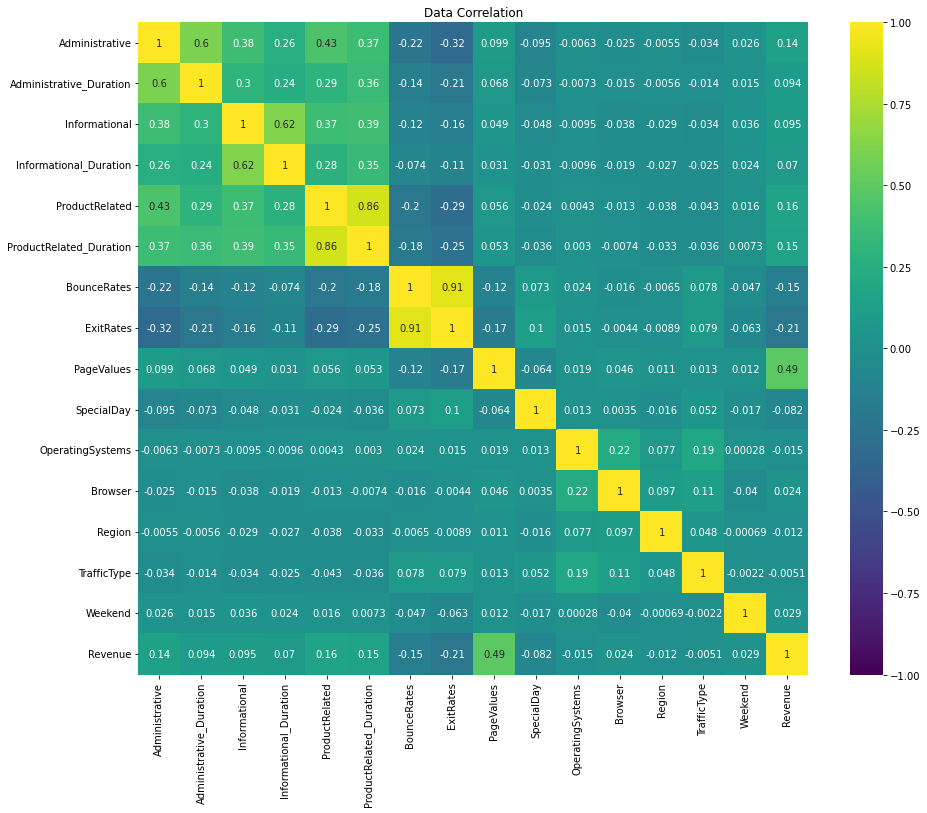

In [ ]:
plt.figure(figsize=(15,12))
ax = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot = True, cmap = 'viridis')
plt.title('Data Correlation')
plt.show()

## Data Visualisation

### Univariate Analysis

#### Categorical Variable
Revenue, Month, OperatingSystems, Browser, Region, TrafficType, VisitorType and  Weekend

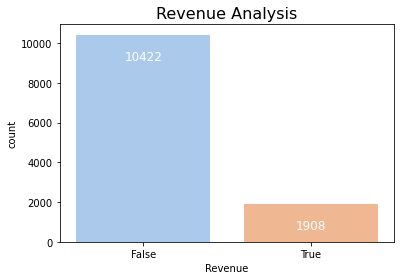

Percentage (%) for Each Category:
False    84.525547
True     15.474453
Name: Revenue, dtype: float64


In [ ]:
ax = sns.countplot(x = 'Revenue', data = data, palette = 'pastel')
plt.title('Revenue Analysis', fontsize = 16)
for p in ax.patches:
          ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()),
                      ha = 'center', va = 'top', color = 'white', size = 12)
plt.show()

print("Percentage (%) for Each Category:")
print(data['Revenue'].value_counts(normalize = True)*100)

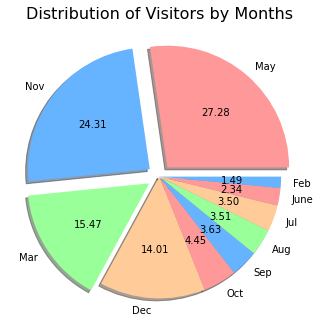

Count for Each Month:
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64


In [ ]:
plt.figure(figsize = (12,7))
plt.subplot(1,2,1)
plt.title('Distribution of Visitors by Months', fontsize = 16)
plt.pie(x = data['Month'].value_counts(),
       labels = ['May', 'Nov', 'Mar', 'Dec', 'Oct', 'Sep', 'Aug', 'Jul', 'June', 'Feb'],
       autopct='%.2f',
       colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'],
       shadow = True,
       explode = (0.1,0.1,0.1,0,0,0,0,0,0,0))
plt.show()

print("Count for Each Month:")
print(data['Month'].value_counts())

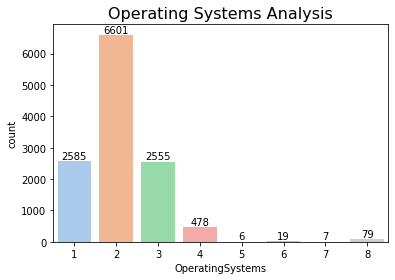

Percentage (%) for Each Category:
2    53.536091
1    20.965126
3    20.721817
4     3.876723
8     0.640714
6     0.154096
7     0.056772
5     0.048662
Name: OperatingSystems, dtype: float64


In [ ]:
ax = sns.countplot(x = 'OperatingSystems', data = data, palette = 'pastel')
plt.title('Operating Systems Analysis', fontsize = 16)
for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.4, p.get_height()),
                    ha = 'center', va = 'bottom', color = 'black', size = 10)
plt.show()
print("Percentage (%) for Each Category:")
print(data['OperatingSystems'].value_counts(normalize = True)*100)

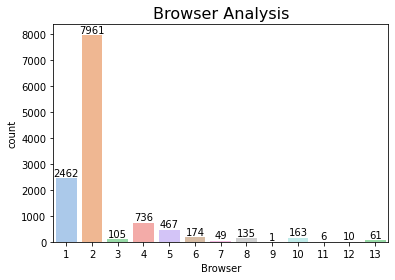

Percentage (%) for Each Category:
2     64.566099
1     19.967559
4      5.969181
5      3.787510
6      1.411192
10     1.321979
8      1.094891
3      0.851582
13     0.494728
7      0.397405
12     0.081103
11     0.048662
9      0.008110
Name: Browser, dtype: float64


In [ ]:
ax = sns.countplot(x = 'Browser', data = data, palette = 'pastel')
plt.title('Browser Analysis', fontsize = 16)
for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.4, p.get_height()),
                    ha = 'center', va = 'bottom', color = 'black', size = 10)
plt.show()
print("Percentage (%) for Each Category:")
print(data['Browser'].value_counts(normalize = True)*100)

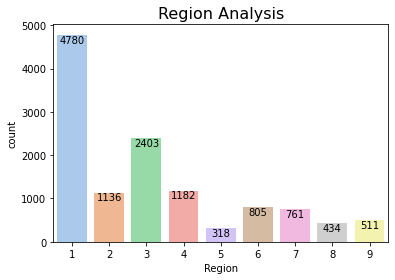

Percentage (%) for Each Category:
1    38.767234
3    19.489051
4     9.586375
2     9.213301
6     6.528792
7     6.171938
9     4.144363
8     3.519870
5     2.579075
Name: Region, dtype: float64


In [ ]:
ax = sns.countplot(x = 'Region', data = data, palette = 'pastel')
plt.title('Region Analysis', fontsize = 16)
for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.4, p.get_height()),
                    ha = 'center', va = 'top', color = 'black', size = 10)
plt.show()

print("Percentage (%) for Each Category:")
print(data['Region'].value_counts(normalize = True)*100)

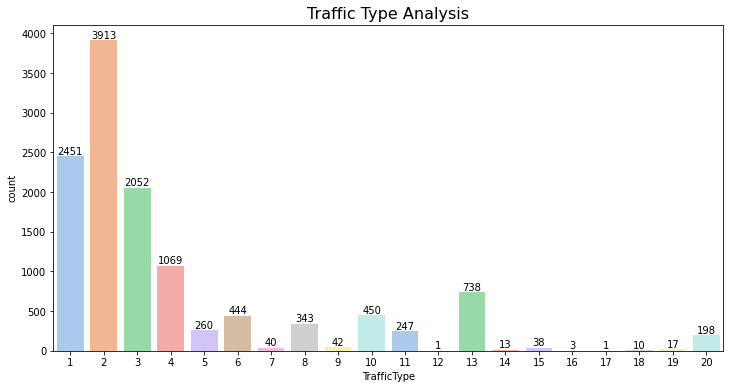

Percentage (%) for Each Category:
2     31.735604
1     19.878345
3     16.642336
4      8.669911
13     5.985401
10     3.649635
6      3.600973
8      2.781833
5      2.108678
11     2.003244
20     1.605839
9      0.340633
7      0.324412
15     0.308191
19     0.137875
14     0.105434
18     0.081103
16     0.024331
12     0.008110
17     0.008110
Name: TrafficType, dtype: float64


In [ ]:
plt.figure(figsize = (12, 6))
ax = sns.countplot(x = 'TrafficType', data = data, palette = 'pastel')
plt.title('Traffic Type Analysis', fontsize = 16)
for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.4, p.get_height()),
                    ha = 'center', va = 'bottom', color = 'black', size = 10)
plt.show()
print("Percentage (%) for Each Category:")
print(data['TrafficType'].value_counts(normalize = True)*100)

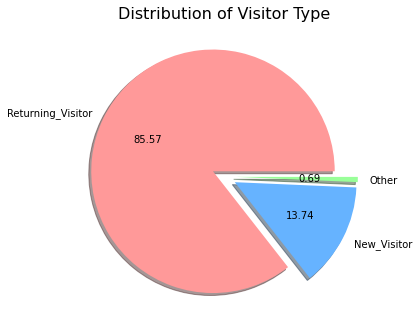

Count for Each Category:
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64


In [ ]:
plt.figure(figsize = (12,7))
plt.subplot(1,2,1)
plt.title('Distribution of Visitor Type', fontsize = 16)
plt.pie(x = data['VisitorType'].value_counts(),
       labels = ['Returning_Visitor', 'New_Visitor', 'Other'],
       autopct='%.2f',
       colors=['#ff9999', '#66b3ff' ,'#99ff99'],
       shadow = True,
       explode = (0.1,0.1,0.1))
plt.show()

print("Count for Each Category:")
print(data['VisitorType'].value_counts())

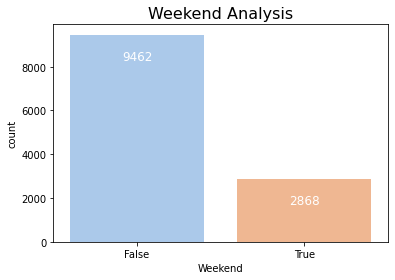

Percentage (%) for Each Category:
False    76.739659
True     23.260341
Name: Weekend, dtype: float64


In [ ]:
ax = sns.countplot(x = 'Weekend', data = data, palette = 'pastel')
plt.title('Weekend Analysis', fontsize = 16)
for p in ax.patches:
          ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()),
                      ha = 'center', va = 'top', color = 'white', size = 12)
plt.show()

print("Percentage (%) for Each Category:")
print(data['Weekend'].value_counts(normalize = True)*100)

#### Numerical Variable
Administrative Administrative_Duration Informational, Informational_Duration, ProductRelated, ProductRelated_Duration, BounceRates, ExitRates, PageValues and SpecialDay

Text(0, 0.5, 'Count')

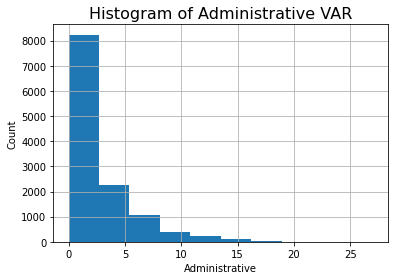

In [ ]:
data.hist(column = 'Administrative', bins = 10)
plt.title('Histogram of Administrative VAR', fontsize = 16)
plt.xlabel('Administrative')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

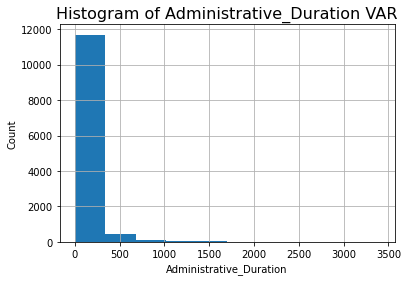

In [ ]:
data.hist(column = 'Administrative_Duration', bins = 10)
plt.title('Histogram of Administrative_Duration VAR', fontsize = 16)
plt.xlabel('Administrative_Duration')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

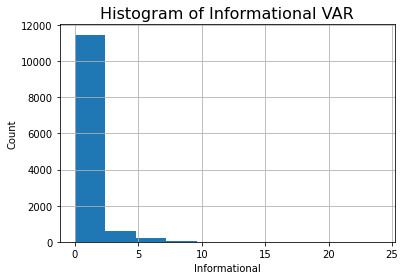

In [ ]:
data.hist(column = 'Informational', bins = 10)
plt.title('Histogram of Informational VAR', fontsize = 16)
plt.xlabel('Informational')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

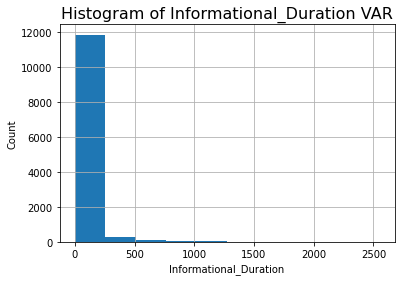

In [ ]:
data.hist(column = 'Informational_Duration', bins = 10)
plt.title('Histogram of Informational_Duration VAR', fontsize = 16)
plt.xlabel('Informational_Duration')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

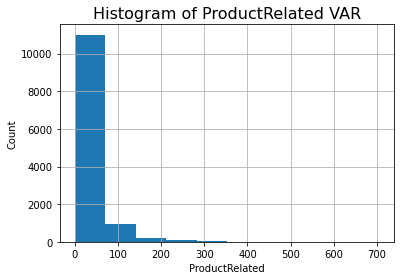

In [ ]:
data.hist(column = 'ProductRelated', bins = 10)
plt.title('Histogram of ProductRelated VAR', fontsize = 16)
plt.xlabel('ProductRelated')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

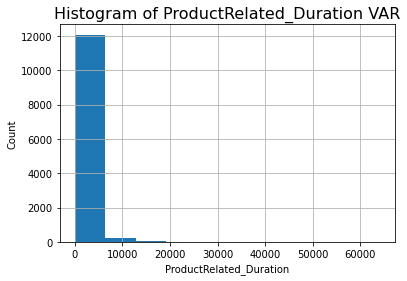

In [ ]:
data.hist(column = 'ProductRelated_Duration', bins = 10)
plt.title('Histogram of ProductRelated_Duration VAR', fontsize = 16)
plt.xlabel('ProductRelated_Duration')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

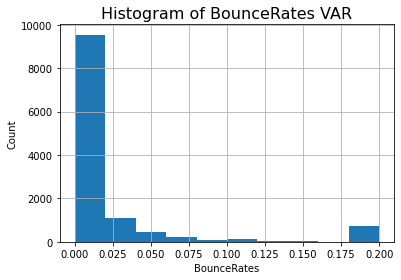

In [ ]:
data.hist(column = 'BounceRates', bins = 10)
plt.title('Histogram of BounceRates VAR', fontsize = 16)
plt.xlabel('BounceRates')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

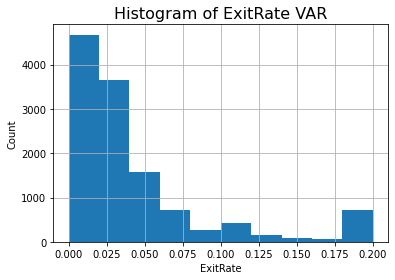

In [ ]:
data.hist(column = 'ExitRates', bins = 10)
plt.title('Histogram of ExitRate VAR', fontsize = 16)
plt.xlabel('ExitRate')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

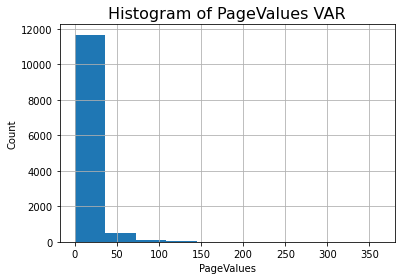

In [ ]:
data.hist(column = 'PageValues', bins = 10)
plt.title('Histogram of PageValues VAR', fontsize = 16)
plt.xlabel('PageValues')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

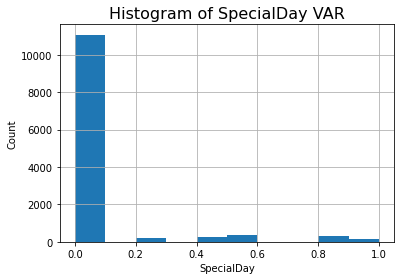

In [ ]:
data.hist(column = 'SpecialDay', bins = 10)
plt.title('Histogram of SpecialDay VAR', fontsize = 16)
plt.xlabel('SpecialDay')
plt.ylabel('Count')

# Data Preprocessing

## Remove Duplicate Values

In [ ]:
data.duplicated().sum()

125

In [ ]:
data1 = data.drop_duplicates()
data1.duplicated().sum()

0

## Handle Outliers - Numeric Variable

In [ ]:
numeric = data1[data1.columns[0:10]]
numeric.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0


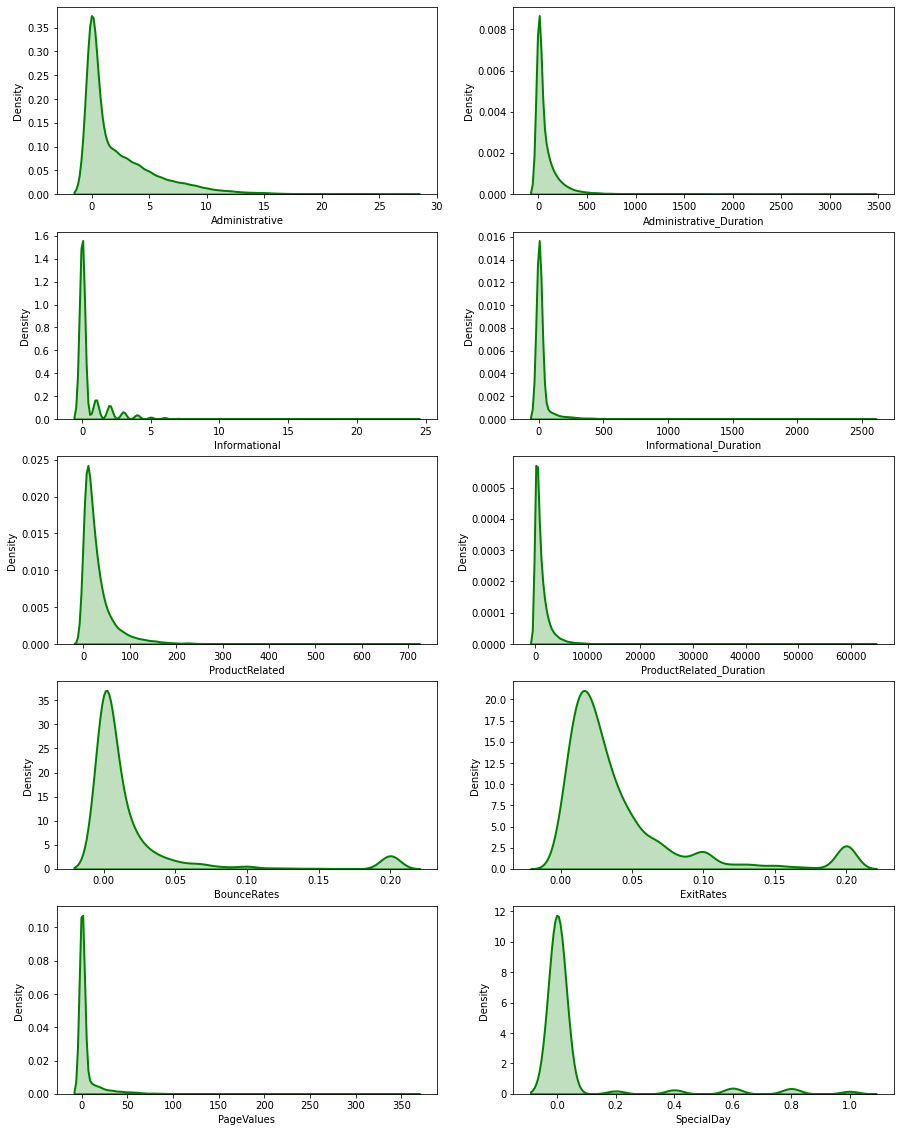

In [ ]:
plt.rcParams['figure.figsize'] = (15, 20)

# Plotting KDE Plot to Show Distribution of Variable
for i, column in enumerate(numeric.columns, 1):
    plt.subplot(5, 2, i)
    sns.distplot(numeric[column], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 2},
                     label = 'Normal', color = 'green')

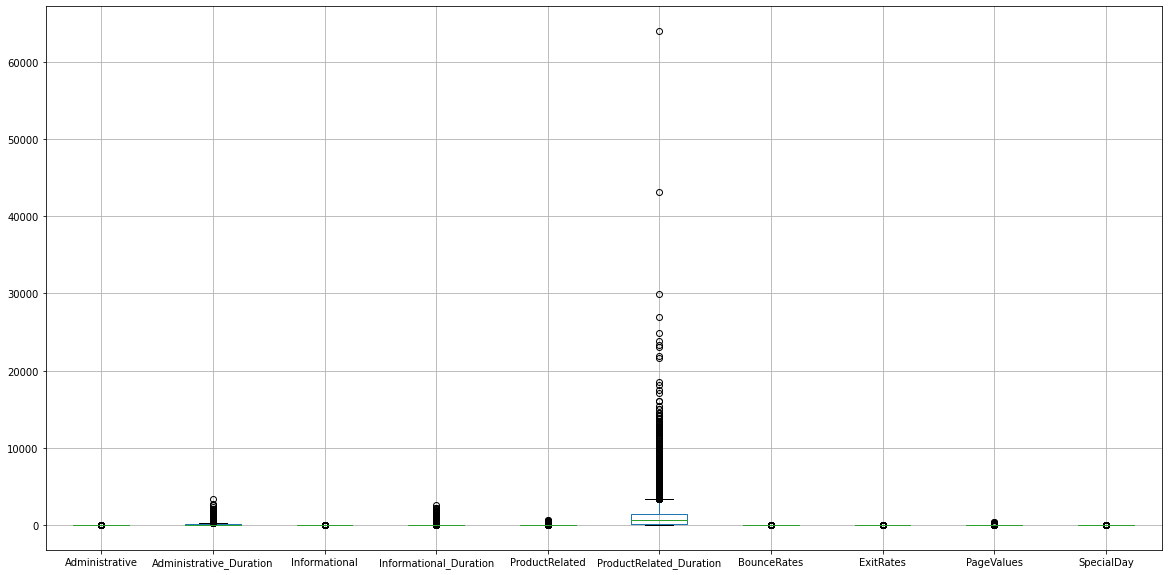

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)

# Plotting Boxplot to Detect Outlier
numeric.boxplot()

Box-Cox Transformation process of Administrative is completed


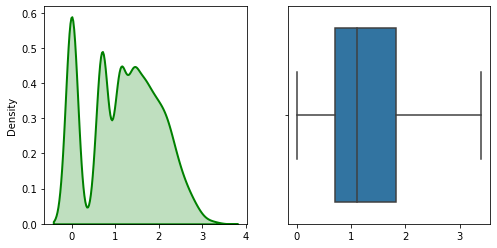

Box-Cox Transformation process of Administrative_Duration is completed


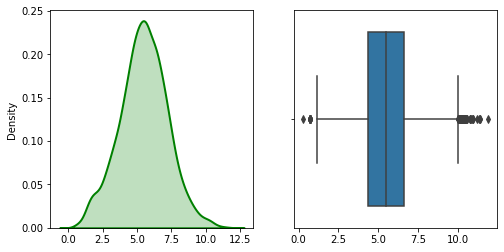

Box-Cox Transformation process of Informational is completed


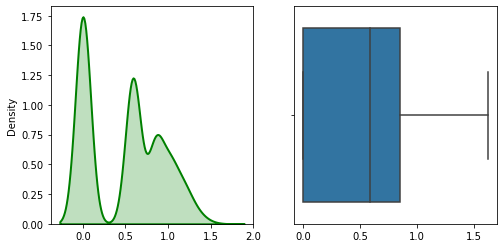

Box-Cox Transformation process of Informational_Duration is completed


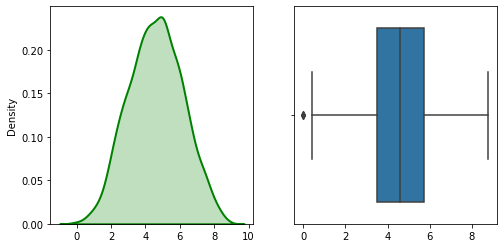

Box-Cox Transformation process of ProductRelated is completed


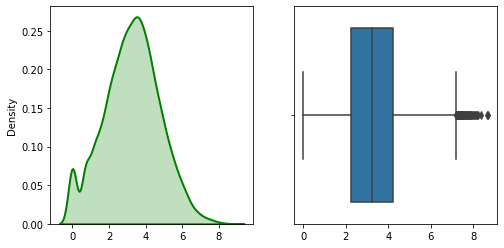

Box-Cox Transformation process of ProductRelated_Duration is completed


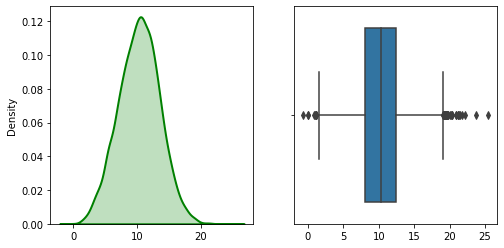

Box-Cox Transformation process of BounceRates is completed


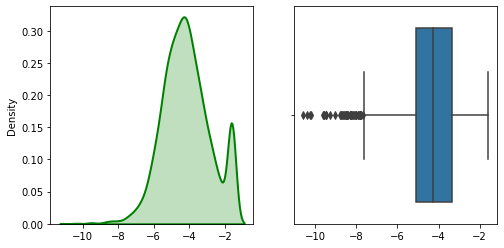

Box-Cox Transformation process of ExitRates is completed


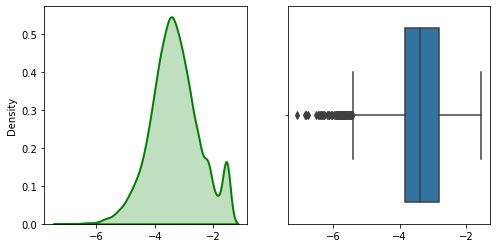

Box-Cox Transformation process of PageValues is completed


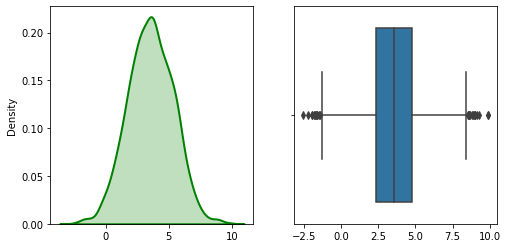

Box-Cox Transformation process of SpecialDay is completed


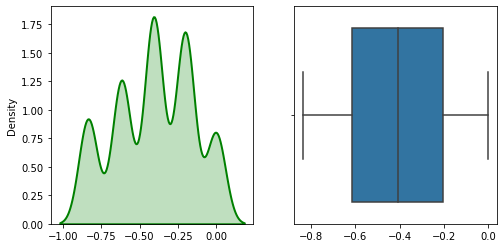

In [ ]:
from scipy import stats

plt.rcParams['figure.figsize'] = (8, 4)

# Transform Training Data and Save lambda Value
df_list = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated',
           'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

for col in df_list:
    if data1[col].dtypes == 'int64' or data1[col].dtypes == 'float64':
        # Data must be POSITIVE
        pos_data = data1[col][data1[col] > 0]
        col_data, fitted_lambda = stats.boxcox(pos_data)

        # Create axes to draw plots
        fig, ax = plt.subplots(1,2)

        sns.distplot(col_data, hist = False, kde = True,
                     kde_kws = {'shade': True, 'linewidth': 2},
                     label = 'Normal', color = 'green', ax = ax[0])
        data1.loc[data1[col] > 0, col] = col_data
        print('Box-Cox Transformation process of {} is completed'.format(col))

        plt.subplot(122)
        sns.boxplot(col_data)
        plt.show()

## Encode Categorical VARs

Only for CATEGORICAL Input and Target Variables using Label Encoding technique

In [ ]:
data1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,0.000000,0.000000,-1.611313,-1.548960,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,0.713161,5.562811,0.000000,-2.180138,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,0.0,0.0,0.0,0.000000,0.000000,-1.611313,-1.548960,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,0.713161,1.048043,-3.002233,-1.876364,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,2.533552,10.217742,-3.923113,-2.790702,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create an Instance of LabelEncoder
le = LabelEncoder()

# Fit and Transform Categorical Variable
data1['Month'] = le.fit_transform(data1['Month'])
data1['VisitorType'] = le.fit_transform(data1['VisitorType'])
data1['Weekend'] = le.fit_transform(data1['Weekend'])
data1['Revenue'] = le.fit_transform(data1['Revenue'])

# the Label Assigned is based on Alphabetical order from '0'
# and it's CASE SENSITIVE

# Display Dataframe
data1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,0.000000,0.000000,-1.611313,-1.548960,0.0,0.0,2,1,1,1,1,2,0,0
1,0.0,0.0,0.0,0.0,0.713161,5.562811,0.000000,-2.180138,0.0,0.0,2,2,2,1,2,2,0,0
2,0.0,0.0,0.0,0.0,0.000000,0.000000,-1.611313,-1.548960,0.0,0.0,2,4,1,9,3,2,0,0
3,0.0,0.0,0.0,0.0,0.713161,1.048043,-3.002233,-1.876364,0.0,0.0,2,3,2,2,4,2,0,0
4,0.0,0.0,0.0,0.0,2.533552,10.217742,-3.923113,-2.790702,0.0,0.0,2,3,3,1,4,2,1,0


## Variable Assignment for IV and TV

In [ ]:
x = data1.drop(['Revenue'], axis=1) # Features
y = data1['Revenue'] # Label

x.shape, y.shape

((12205, 17), (12205,))

## Feature Scaling -- Normalisation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5ba7bcf890>,
      dtype=object)

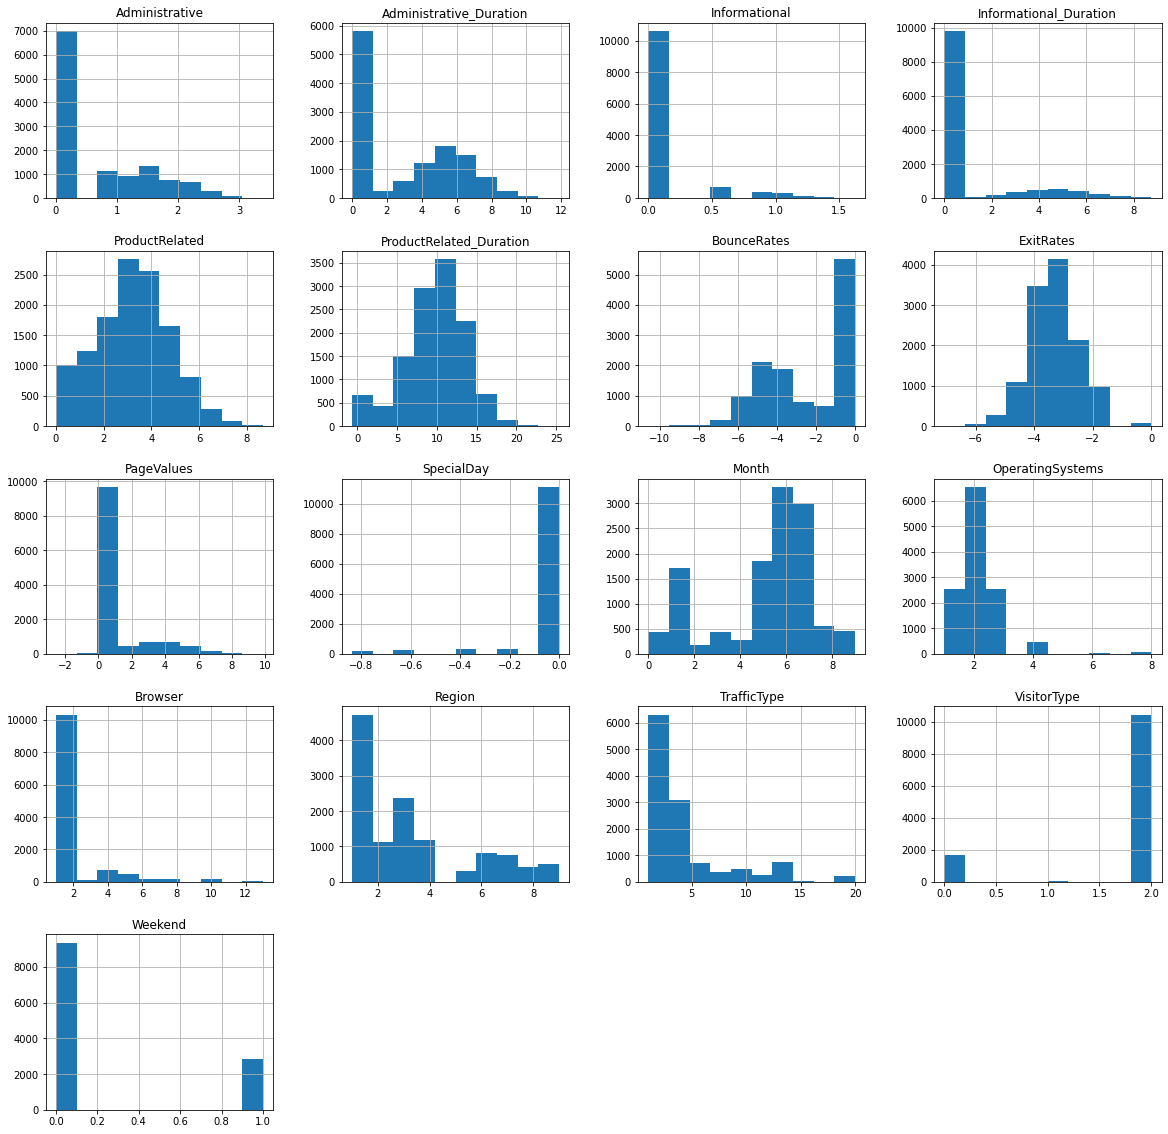

In [ ]:
plt.rcParams['figure.figsize'] = (20, 20)
x.hist()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# For INPUT VAR only
norm = MinMaxScaler().fit(x)
x_norm = norm.transform(x)
x_norm # X Normalisation

array([[0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.05263158, 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.10526316, 1.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.63157895, 1.        ,
        1.        ],
       [0.41350369, 0.44238414, 0.        , ..., 0.52631579, 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.05263158, 0.        ,
        1.        ]])

## Class Balancing

Only perform for Categorical TV -- Classification Problem

In [ ]:
data1['Revenue'].value_counts()

0    10297
1     1908
Name: Revenue, dtype: int64

0    10297
1     1908
Name: Revenue, dtype: int64


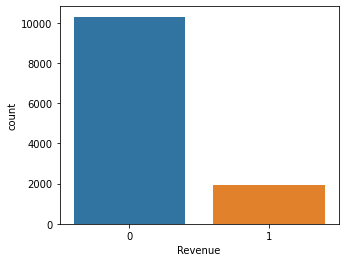

In [ ]:
# Revenue = TV
# To Count the Number of Values for Each Catgory, 0 & 1
# Whether it is Balanced or Not
print(data1['Revenue'].value_counts())

plt.rcParams['figure.figsize'] = (5, 4)
sns.countplot(data1['Revenue'])

# Conclusion: TV is IMBALANCED, so Class Balancing will be carried out

In [ ]:
# SMOTE = Synthetic Minority Oversampling Technique

from imblearn.over_sampling import SMOTE
x_b, y_b = SMOTE().fit_resample(x_norm, y)

# x_b = X Balanced

0    10297
1    10297
Name: Revenue, dtype: int64


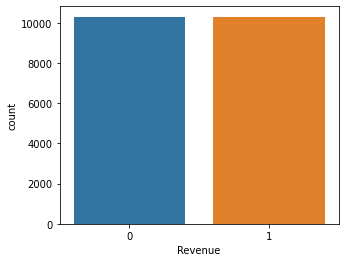

In [ ]:
print(y_b.value_counts())
plt.rcParams['figure.figsize'] = (5, 4)
sns.countplot(x = y_b)

## Data Split

- 80% Training Data and 20% Test Data

In [ ]:
# Balanced Dataset
from sklearn.model_selection import train_test_split
x_train_b, x_test_b, y_train_b, y_test_b = train_test_split(x_b, y_b, test_size = 0.2, random_state = 0)

In [ ]:
# Display Dimension of Data Frames
x_train_b.shape, y_train_b.shape, x_test_b.shape, y_test_b.shape

((16475, 17), (16475,), (4119, 17), (4119,))

# Modelling

## Homogeneous Ensemble

### Bagging (Bootstrap Aggregating)

In [ ]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import arange

#### Random Forest

##### Model Construction - Random Forest (Default Parameter)

In [ ]:
# Initialise Random Forest Model
rfc = RandomForestClassifier()

# Fit Random Forest Classifier to Training Data
rfc.fit(x_train_b, y_train_b)

# Make Prediction on Test Data
rfc_pred = rfc.predict(x_test_b)
rfc_prob = rfc.predict_proba(x_test_b)[:, 1]

# Check Model's Accuracy
rfc_test_acc = metrics.accuracy_score(y_test_b, rfc_pred)
print('\033[1m'+"Random Forest Classifier Model Accuracy (%):"+'\033[0m', round(rfc_test_acc *100, 2))

# Check Model's Parameter
print('\033[1m'+"Random Forest Classifier Parameters:"+'\033[0m')
rfc.get_params()

Random Forest Classifier Model Accuracy (%): 93.83
Random Forest Classifier Parameters:


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

##### Model Evaluation - Random Forest (Default Params)

Text(0.5, 0, 'Random Forest Feature Importance')

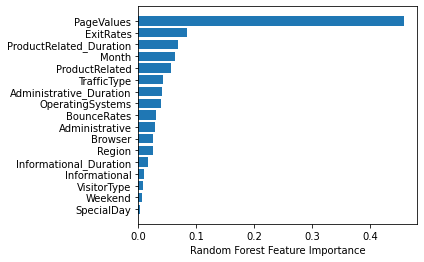

In [ ]:
# Sort the Values of Feature Importance in Descending Order
sorted_idx = rfc.feature_importances_.argsort()

# Plot Horizontal Bar Plot to show Random Forest Feature Importance
plt.barh(data1.columns[sorted_idx], rfc.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

The area under the ROC curve is: 0.98


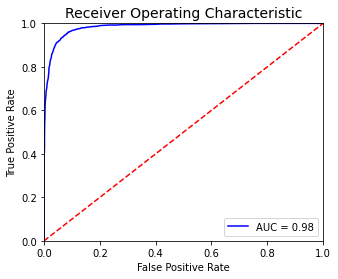

In [ ]:
# Calculate ROC AUC for the Random Forest Classifier
roc_value = roc_auc_score(y_test_b, rfc_prob)
print('The area under the ROC curve is:', round(roc_value, 2))

fpr, tpr, threshold = metrics.roc_curve(y_test_b, rfc_prob)
roc_auc = metrics.auc(fpr, tpr)

# Plotting ROC Curve
plt.rcParams['figure.figsize'] = (5, 4)
plt.title('Receiver Operating Characteristic', fontsize = 14)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
cm = confusion_matrix(y_test_b, rfc_pred)
cm
# TP, FP
# FN, TN

array([[1883,  152],
       [ 109, 1975]])

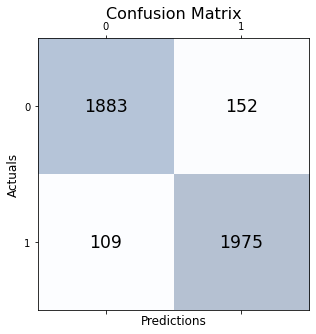

In [ ]:
# Visualise Confusion Matrix
fig, ax = plt.subplots(figsize = (5, 5))
ax.matshow(cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x = j, y = i, s = cm[i, j],
                va = 'center', ha = 'center', size = 'xx-large')

plt.xlabel('Predictions', fontsize = 12)
plt.ylabel('Actuals', fontsize = 12)
plt.title('Confusion Matrix', fontsize = 16)
plt.show()

##### Model Optimisation - Random Forest (HyperParams Tuning)

In [ ]:
# Initialise RandomForest Model
rfc_pt = RandomForestClassifier(random_state = 2)

# Define Parameters
parameters = dict() # dictionary
parameters['bootstrap'] = [True]
parameters['max_features'] = ['sqrt']
parameters['max_depth'] = [5, 10, 15]
parameters['n_estimators'] = [500, 1000]

# Define Cross Validation
cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 3, random_state = 1)

# Perform GridSeachCV
rfc_grid = GridSearchCV(estimator = rfc_pt, param_grid = parameters,
                        scoring = 'accuracy', cv = cv, n_jobs = -1, verbose = 0)

# Fit RandomForest Classifier to Training Data
rfc_grid.fit(x_train_b, y_train_b)

# Show Result from Grid Search
print("Results from Grid Search for RandomForest Model" )
print("\n Best Estimator across ALL Searched Params:\n", rfc_grid.best_estimator_)
print("\n Best Parameters across ALL Searched Params:\n", rfc_grid.best_params_)
print("\n Best Score across ALL Searched Params:\n", rfc_grid.best_score_)

Results from Grid Search for RandomForest Model

 Best Estimator across ALL Searched Params:
 RandomForestClassifier(max_depth=15, max_features='sqrt', n_estimators=500,
                       random_state=2)

 Best Parameters across ALL Searched Params:
 {'bootstrap': True, 'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 500}

 Best Score across ALL Searched Params:
 0.9280728376327768


In [ ]:
# Define the Estimator for RandomForest Model
rfc_final = rfc_grid.best_estimator_

# Make Prediction on Test Data
rfc_final_pred = rfc_final.predict(x_test_b)
rfc_final_prob = rfc_final.predict_proba(x_test_b)[:, 1]

# Check Model's Accuracy
print('\033[1m'+"Random Forest Classifier with HyperParams Tuning \nModel Accuracy (%):"+'\033[0m',
      round(metrics.accuracy_score(y_test_b, rfc_final_pred) *100, 2))

Random Forest Classifier with HyperParams Tuning 
Model Accuracy (%): 92.74


In [ ]:
# Calculate Accuracy of Random Forest Models
rfc_train = rfc.score(x_train_b, y_train_b)
rfc_test = rfc.score(x_test_b, y_test_b)
rfc_final_train = rfc_final.score(x_train_b, y_train_b)
rfc_final_test = rfc_final.score(x_test_b, y_test_b)

# Determine the Model is Good Fit, Underfit or Overfit
performance = {'Model':['Default RCF', 'RFC w/ HyperParamsTuning'],
               'Accuracy in Train':[rfc_train, rfc_final_train],
               'Accuracy in Test':[rfc_test, rfc_final_test]}

# Calling DataFrame constructor
overfitting = pd.DataFrame(performance)
print('\033[1m'+"RANDOM FOREST MODEL COMPARISON for Overfitting Check"+'\033[0m\n')
print(overfitting)

RANDOM FOREST MODEL COMPARISON for Overfitting Check

                      Model  Accuracy in Train  Accuracy in Test
0               Default RCF           1.000000          0.936635
1  RFC w/ HyperParamsTuning           0.985675          0.927410


In [ ]:
# Initialise Random Forest Model
rfc_final = RandomForestClassifier(
    bootstrap = True,        # method used to sample data points
    max_depth= 10,           # maximum number of levels allowed in each decision tree
    max_features = 'sqrt',   # number of features in consideration at every split
    min_samples_leaf = 200,  # minimum sample number that can be stored in a leaf node
    min_samples_split = 4,   # minimum sample number to split a node
    max_leaf_nodes = 20,     # maximum number of leaf nodes
    n_estimators = 500,      # number of trees in the random forest
    random_state = 2, n_jobs  = -1)

# Fit Random Forest Classifier to Training Data
rfc_final.fit(x_train_b, y_train_b)

# Make Prediction using Test Data and Model
rfc_final_pred = rfc_final.predict(x_test_b)
rfc_final_prob = rfc_final.predict_proba(x_test_b)[:, 1]

# Check Model's Accuracy
rfc_final_test_acc = metrics.accuracy_score(y_test_b, rfc_final_pred)
print('\033[1m'+"Random Forest Classifier Model Accuracy (%):"+'\033[0m', round(rfc_final_test_acc *100, 2))

# Check Model's Parameter
print('\033[1m'+"Random Forest Classifier Parameters:"+'\033[0m')
rfc_final.get_params()

Random Forest Classifier Model Accuracy (%): 87.69
Random Forest Classifier Parameters:


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': 20,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 200,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 2,
 'verbose': 0,
 'warm_start': False}

##### Model Evaluation - Random Forest (Hyperparameter Tuning)

Text(0.5, 0, 'Random Forest Feature Importance')

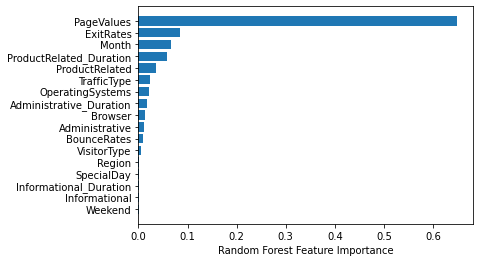

In [ ]:
# Sort the Values of Feature Importance in Descending Order
sorted_idx = rfc_final.feature_importances_.argsort()

# Plot Horizontal Bar Plot to show Random Forest Feature Importance
plt.barh(data1.columns[sorted_idx], rfc_final.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

The area under the ROC curve is: 0.95


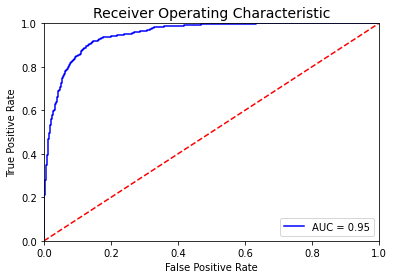

In [ ]:
# Calculate ROC AUC for the Random Forest Classifier
roc_value = roc_auc_score(y_test_b, rfc_final_prob)
print('The area under the ROC curve is:', round(roc_value, 2))

fpr, tpr, threshold = metrics.roc_curve(y_test_b, rfc_final_prob)
roc_auc = metrics.auc(fpr, tpr)

# Plotting ROC Curve
plt.rcParams['figure.figsize'] = (5, 4)
plt.title('Receiver Operating Characteristic', fontsize = 14)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
cm = confusion_matrix(y_test_b, rfc_final_pred)
cm
# TN, FN
# FP, TP

array([[1812,  223],
       [ 284, 1800]])

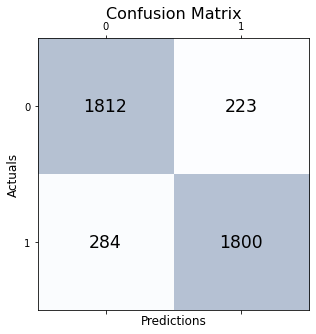

In [ ]:
# Visualise Confusion Matrix
fig, ax = plt.subplots(figsize = (5, 5))
ax.matshow(cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x = j, y = i, s = cm[i, j],
                va = 'center', ha = 'center', size = 'xx-large')

plt.xlabel('Predictions', fontsize = 12)
plt.ylabel('Actuals', fontsize = 12)
plt.title('Confusion Matrix', fontsize = 16)
plt.show()

#### Extra Trees (Extremely Randomized Trees)

##### Model Construction - Extra Trees (Default Parameter)

In [ ]:
# Initialise Extra Trees Model
etc = ExtraTreesClassifier()

# Fit Extra Trees Classifier on Training Data
etc.fit(x_train_b, y_train_b)

# Make Prediction using Test Data and Model
etc_pred = etc.predict(x_test_b)
etc_prob = etc.predict_proba(x_test_b)[:, 1]

# Check Model's Accuracy
etc_test_acc = metrics.accuracy_score(y_test_b, etc_pred)
print('Extra Trees Classifier Model Accuracy (%):', round(etc_test_acc *100, 2))

# Check Model's Parameter
print('Extra Trees Classifier Parameters:')
etc.get_params()

Extra Trees Classifier Model Accuracy (%): 94.32
Extra Trees Classifier Parameters:


{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

##### Model Evaluation - Extra Trees (Default Params)

Text(0.5, 0, 'Extra Trees Feature Importance')

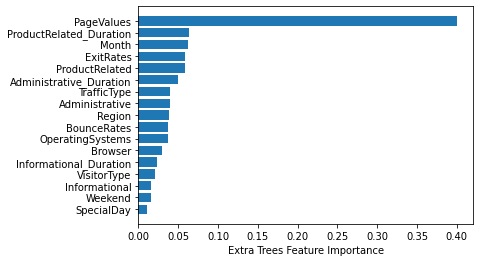

In [ ]:
# Sort the Values of Feature Importance in Descending Order
sorted_idx = etc.feature_importances_.argsort()

# Plot Horizontal Bar Plot to show Extra Trees Feature Importance
plt.barh(data1.columns[sorted_idx], etc.feature_importances_[sorted_idx])
plt.xlabel("Extra Trees Feature Importance")

The area under the ROC curve is: 0.99


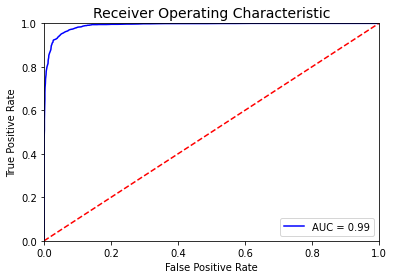

In [ ]:
# Calculate ROC AUC for the Random Forest Classifier
roc_value = roc_auc_score(y_test_b, etc_prob)
print('The area under the ROC curve is:', round(roc_value, 2))

fpr, tpr, threshold = metrics.roc_curve(y_test_b, etc_prob)
roc_auc = metrics.auc(fpr, tpr)

# Plotting ROC Curve
plt.rcParams['figure.figsize'] = (5, 4)
plt.title('Receiver Operating Characteristic', fontsize = 14)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
cm = confusion_matrix(y_test_b, etc_pred)
cm
# TP, FP
# FN, TN

array([[1876,  159],
       [  59, 2025]])

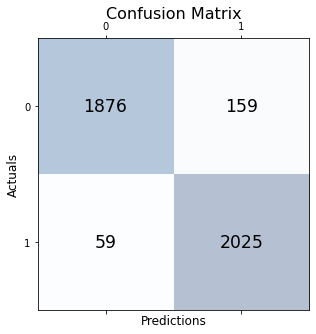

In [ ]:
# Visualise Confusion Matrix
fig, ax = plt.subplots(figsize = (5, 5))
ax.matshow(cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x = j, y = i, s = cm[i, j],
                va = 'center', ha = 'center', size = 'xx-large')

plt.xlabel('Predictions', fontsize = 12)
plt.ylabel('Actuals', fontsize = 12)
plt.title('Confusion Matrix', fontsize = 16)
plt.show()

##### Model Optimisation - Extra Trees (HyperParams Tuning)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Initialise Extra Trees Model
etc_pt = ExtraTreesClassifier(bootstrap = True, random_state = 2)

# Define Parameters
parameters = dict() # dictionary
parameters['max_features'] = [5, 10, 17]
parameters['max_depth'] = [10, 15]
parameters['n_estimators'] = [500, 1000]
parameters['min_samples_leaf'] = [3, 6, 9]
parameters['n_estimators'] = [1500, 3000]

# Perform RandomizedSeachCV
etc_random = RandomizedSearchCV(n_iter = 100, estimator = etc_pt, param_distributions = parameters,
                                 cv = 3, scoring = "accuracy", n_jobs = -1)

# Fit Extra Trees Classifier to Training Data
etc_random.fit(x_train_b, y_train_b)

# Show Result from Randomized Search
print("Results from Randomized Search for XGBoost Model" )
print("\n Best Estimator across ALL Searched Params:\n", etc_random.best_estimator_)
print("\n Best Parameters across ALL Searched Params:\n", etc_random.best_params_)
print("\n Best Score across ALL Searched Params:\n", etc_random.best_score_)

Results from Randomized Search for XGBoost Model

 Best Estimator across ALL Searched Params:
 ExtraTreesClassifier(bootstrap=True, max_depth=15, max_features=17,
                     min_samples_leaf=3, n_estimators=1500, random_state=2)

 Best Parameters across ALL Searched Params:
 {'n_estimators': 1500, 'min_samples_leaf': 3, 'max_features': 17, 'max_depth': 15}

 Best Score across ALL Searched Params:
 0.9045826561454001


In [ ]:
# Define the Estimator for Extra Trees Model
etc_final = etc_random.best_estimator_

# Make Prediction on Test Data
etc_final_pred = etc_final.predict(x_test_b)
etc_final_prob = etc_final.predict_proba(x_test_b)[:, 1]

# Check Model Accuracy
print('\033[1m'+"Extra Trees Classifier with HyperParams Tuning \nModel Accuracy (%):"+'\033[0m',
      round(metrics.accuracy_score(y_test_b, etc_final_pred) *100, 2))

Extra Trees Classifier with HyperParams Tuning 
Model Accuracy (%): 90.39


In [ ]:
# Calculate Accuracy of Extra Trees Models
etc_train = etc.score(x_train_b, y_train_b)
etc_test = etc.score(x_test_b, y_test_b)
etc_final_train = etc_final.score(x_train_b, y_train_b)
etc_final_test = etc_final.score(x_test_b, y_test_b)

# Determine the Model is Good Fit, Underfit or Overfit
performance = {'Model':['Default ETC', 'ETC w/ HyperParamsTuning'],
               'Accuracy in Train':[etc_train, etc_final_train],
               'Accuracy in Test':[etc_test, etc_final_test]}

# Calling DataFrame constructor
overfitting = pd.DataFrame(performance)
print('\033[1m'+"EXTRA TREES MODEL COMPARISON for Overfitting Check"+'\033[0m\n')
print(overfitting)

EXTRA TREES MODEL COMPARISON for Overfitting Check

                      Model  Accuracy in Train  Accuracy in Test
0               Default ETC           1.000000           0.94319
1  ETC w/ HyperParamsTuning           0.945493           0.90386


In [ ]:
# Initialise Extra Trees Model
etc_final = ExtraTreesClassifier(
    bootstrap = True, # method used to sample data points (done)
    max_depth = 9, # maximum number of levels allowed in each decision tree (done)
    max_features = 17, # number of features in consideration at every split (done)
    min_samples_leaf = 9,  # minimum sample number that can be stored in a leaf node (done)
    n_estimators = 3000, # number of trees in the extra trees (done)
    random_state = 2, n_jobs  = -1)

# Fit Extra Trees Classifier to Training Data
etc_final.fit(x_train_b, y_train_b)

# Make Prediction using Test Data and Model
etc_final_pred = etc_final.predict(x_test_b)
etc_final_prob = etc_final.predict_proba(x_test_b)[:, 1]

# Check Model's Accuracy
etc_final_test_acc = metrics.accuracy_score(y_test_b, etc_final_pred)
print('Extra Trees Classifier Model Accuracy (%):', round(etc_final_test_acc *100, 2))

# Check Model's Parameter
print('Extra Trees Classifier Parameters:')
etc_final.get_params()

Extra Trees Classifier Model Accuracy (%): 87.81
Extra Trees Classifier Parameters:


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 9,
 'max_features': 17,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 9,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 3000,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 2,
 'verbose': 0,
 'warm_start': False}

##### Model Evaluation - Extra Trees (HyperParams Tuning)

Text(0.5, 0, 'Random Forest Feature Importance')

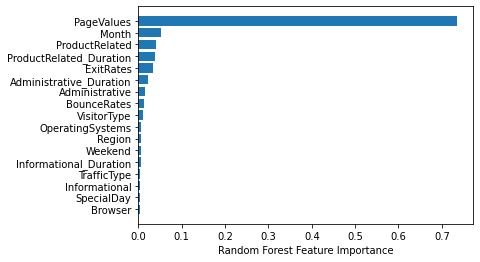

In [ ]:
# Sort the Values of Feature Importance in Descending Order
sorted_idx = etc_final.feature_importances_.argsort()

# Plot Horizontal Bar Plot to show Extra Trees Feature Importance
plt.barh(data1.columns[sorted_idx], etc_final.feature_importances_[sorted_idx])
plt.xlabel("Extra Trees Feature Importance")

The area under the ROC curve is: 0.95


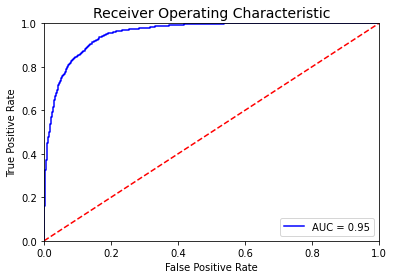

In [ ]:
# Calculate ROC AUC for the Random Forest Classifier
roc_value = roc_auc_score(y_test_b, etc_final_prob)
print('The area under the ROC curve is:', round(roc_value, 2))

fpr, tpr, threshold = metrics.roc_curve(y_test_b, etc_final_prob)
roc_auc = metrics.auc(fpr, tpr)

# Plotting ROC Curve
plt.rcParams['figure.figsize'] = (5, 4)
plt.title('Receiver Operating Characteristic', fontsize = 14)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
cm = confusion_matrix(y_test_b, etc_final_pred)
cm
# TP, FP
# FN, TN

array([[1791,  244],
       [ 265, 1819]])

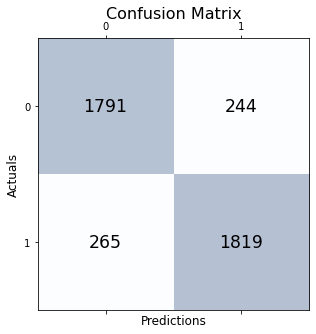

In [ ]:
# Visualise Confusion Matrix
fig, ax = plt.subplots(figsize = (5, 5))
ax.matshow(cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x = j, y = i, s = cm[i, j],
                va = 'center', ha = 'center', size = 'xx-large')

plt.xlabel('Predictions', fontsize = 12)
plt.ylabel('Actuals', fontsize = 12)
plt.title('Confusion Matrix', fontsize = 16)
plt.show()

#### Bagging Model Comparison / Selection

In [ ]:
# Calculate Accuracy of Bagging Models
rfc_train = rfc.score(x_train_b, y_train_b)
rfc_test = rfc.score(x_test_b, y_test_b)
etc_train = etc.score(x_train_b, y_train_b)
etc_test = etc.score(x_test_b, y_test_b)
rfc_final_train = rfc_final.score(x_train_b, y_train_b)
rfc_final_test = rfc_final.score(x_test_b, y_test_b)
etc_final_train = etc_final.score(x_train_b, y_train_b)
etc_final_test = etc_final.score(x_test_b, y_test_b)

# Compare Accuracy of the Models to Select the Best Model in Bagging
# Determine the Model is Good Fit, Underfit or Overfit
performance = {'Model':['Default RCF', 'Default ETC',
                        'RFC w/ HyperParamsTuning',
                        'ETC w/ HyperParamsTuning'],
 'Accuracy in Train':[rfc_train, etc_train, rfc_final_train, etc_final_train],
 'Accuracy in Test':[rfc_test, etc_test, rfc_final_test, etc_final_test]}

# Calling DataFrame constructor
modelcomparison = pd.DataFrame(performance)
print('\033[1m'+"BAGGING MODEL COMPARISON for Overfitting Check and Model Selection"+'\033[0m\n')
print(modelcomparison)

BAGGING MODEL COMPARISON for Overfitting Check and Model Selection

                      Model  Accuracy in Train  Accuracy in Test
0               Default RCF           1.000000          0.936635
1               Default ETC           1.000000          0.947075
2  RFC w/ HyperParamsTuning           0.876115          0.876912
3  ETC w/ HyperParamsTuning           0.884249          0.876426


### Boosting

In [ ]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

#### XGBoost (Extreme Gradient Boosting)

##### Model Construction - XGBoost (Default Parameter)

In [ ]:
# Initialise XGBoost Model
xgb = XGBClassifier()

# Fit XGBoost Classifier to Training Data
xgb.fit(x_train_b, y_train_b)

# Make Prediction using Test Data and Model
xgb_pred = xgb.predict(x_test_b)
xgb_prob = xgb.predict_proba(x_test_b)[:, 1]

# Check Model's Accuracy
xgb_test_acc = metrics.accuracy_score(y_test_b, xgb_pred)
print('\033[1m'+"XGBoost Classifier Model Accuracy (%):"+'\033[0m', round(xgb_test_acc *100, 2))

# Check Model's Parameter
print('\033[1m'+"XGBoost Classifier Parameters:"+'\033[0m')
xgb.get_params()

XGBoost Classifier Model Accuracy (%): 91.96
XGBoost Classifier Parameters:


{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

##### Model Evaluation - XGBoost (Default Params)

Text(0.5, 0, 'XGBoost Feature Importance')

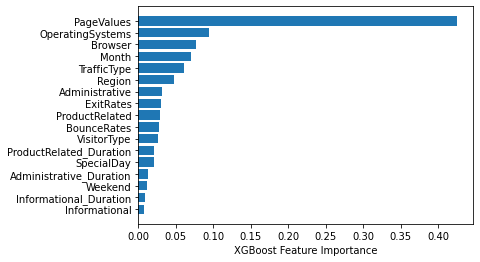

In [ ]:
# Sort the Values of Feature Importance in Descending Order
sorted_idx = xgb.feature_importances_.argsort()

# Plot Horizontal Bar Plot to show XGBoost Feature Importance
plt.barh(data1.columns[sorted_idx], xgb.feature_importances_[sorted_idx])
plt.xlabel("XGBoost Feature Importance")

The area under the ROC curve is: 0.98


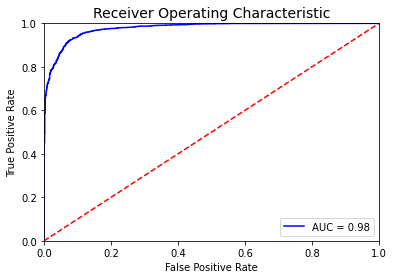

In [ ]:
# Calculate ROC AUC for the XGBoost Classifier
roc_value = roc_auc_score(y_test_b, xgb_prob)
print('The area under the ROC curve is:', round(roc_value, 2))

fpr, tpr, threshold = metrics.roc_curve(y_test_b, xgb_prob)
roc_auc = metrics.auc(fpr, tpr)

# Plotting ROC Curve
plt.rcParams['figure.figsize'] = (5, 4)
plt.title('Receiver Operating Characteristic', fontsize = 14)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
cm = confusion_matrix(y_test_b, xgb_pred)
cm
# TP, FP
# FN, TN

array([[1875,  160],
       [ 159, 1925]])

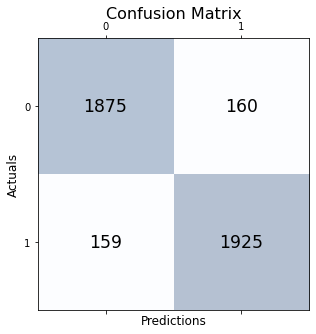

In [ ]:
# Visualise Confusion Matrix
fig, ax = plt.subplots(figsize = (5, 5))
ax.matshow(cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x = j, y = i, s = cm[i, j],
                va = 'center', ha = 'center', size = 'xx-large')

plt.xlabel('Predictions', fontsize = 12)
plt.ylabel('Actuals', fontsize = 12)
plt.title('Confusion Matrix', fontsize = 16)
plt.show()

##### Model Optimisation (Hyper Parameter Tuning) - XGBoost

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Initialise XGBoost Model
xgb_pt = XGBClassifier(n_estimators = 100, learning_rate = 0.1)

# Define Parameters
parameters = dict() # dictionary
parameters['alpha'] = [0, 250, 500, 1000]
parameters['eta'] = [0.01, 0.05, 0.1, 0.2]
parameters['min_child_weight '] = [2, 5, 10]
parameters['subsample '] = [0.5, 1]
parameters['max_depth'] = [4, 6, 8]

# Perform RandomizedSeachCV
xgb_random = RandomizedSearchCV(n_iter = 100, estimator = xgb_pt, param_distributions = parameters,
                                 cv = 3, scoring = "accuracy", n_jobs = -1)

# Declare the Evaluation Data Set
eval_set = [(x_train_b, y_train_b),(x_test_b, y_test_b)]

# Fit XGBoost Classifier to Training Data
xgb_random.fit(X = x_train_b, y = y_train_b, early_stopping_rounds = 50,
               eval_set = eval_set, verbose = 0)

# Show Result from Randomized Search
print("Results from Randomized Search for XGBoost Model" )
print("\n Best Estimator across ALL Searched Params:\n", xgb_random.best_estimator_)
print("\n Best Parameters across ALL Searched Params:\n", xgb_random.best_params_)
print("\n Best Score across ALL Searched Params:\n", xgb_random.best_score_)

Results from Randomized Search for XGBoost Model

 Best Estimator across ALL Searched Params:
 XGBClassifier(alpha=0, eta=0.05, max_depth=8, min_child_weight =5, subsample =1)

 Best Parameters across ALL Searched Params:
 {'subsample ': 1, 'min_child_weight ': 5, 'max_depth': 8, 'eta': 0.05, 'alpha': 0}

 Best Score across ALL Searched Params:
 0.9357815382110849


In [ ]:
# Define the Estimator for XGBoost Model
xgb_final = xgb_random.best_estimator_

# Make Prediction on Test Data
xgb_final_pred = xgb_final.predict(x_test_b)
xgb_final_prob = xgb_final.predict_proba(x_test_b)[:, 1]

# Check Model Accuracy
print('\033[1m'+"XGBoost Classifier with HyperParams Tuning \nModel Accuracy (%):"+'\033[0m',
      round(metrics.accuracy_score(y_test_b, xgb_final_pred) *100, 2))

XGBoost Classifier with HyperParams Tuning 
Model Accuracy (%): 93.71


In [ ]:
# Calculate Accuracy of XGBoost Models
xgb_train = xgb.score(x_train_b, y_train_b)
xgb_test = xgb.score(x_test_b, y_test_b)
xgb_final_train = xgb_final.score(x_train_b, y_train_b)
xgb_final_test = xgb_final.score(x_test_b, y_test_b)

# Determine the Model is Good Fit, Underfit or Overfit
performance = {'Model':['Default XGB', 'XGB w/ HyperParamsTuning'],
               'Accuracy in Train':[xgb_train, xgb_final_train],
               'Accuracy in Test':[xgb_test, xgb_final_test]}

# Calling DataFrame constructor
overfitting = pd.DataFrame(performance)
print('\033[1m'+"XGBOOST MODEL COMPARISON for Overfitting Check"+'\033[0m\n')
print(overfitting)

XGBOOST MODEL COMPARISON for Overfitting Check

                      Model  Accuracy in Train  Accuracy in Test
0               Default XGB           0.924431          0.919641
1  XGB w/ HyperParamsTuning           0.979181          0.937121


In [ ]:
# Initialise XGBoost Model
xgb_final = XGBClassifier(
    subsample = 1,
    min_child_weight = 3, # done
    max_depth = 3, # done
    eta = 0.01,
    alpha = 0,
    reg_lambda = 0.9,
    n_estimators = 100, # done
    learning_rate = 0.1)

# Fit XGBoost Classifier to Training Data
xgb_final.fit(x_train_b, y_train_b)

# Make Prediction using Test Data and Model
xgb_final_pred = xgb_final.predict(x_test_b)
xgb_final_prob = xgb_final.predict_proba(x_test_b)[:, 1]

# Check Model's Accuracy
xgb_final_test_acc = metrics.accuracy_score(y_test_b, xgb_final_pred)
print('XGBoost Classifier Model Accuracy (%):', round(xgb_final_test_acc *100, 2))

# Check Model's Parameter
print('XGBoost Classifier Parameters:')
xgb_final.get_params()

XGBoost Classifier Model Accuracy (%): 92.21
XGBoost Classifier Parameters:


{'alpha': 0,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'eta': 0.01,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 3,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 0.9,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

##### Model Evaluation (Hyper Parameter Tuning) - XGBoost

Text(0.5, 0, 'XGBoost Feature Importance')

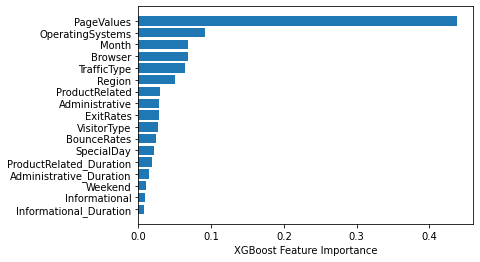

In [ ]:
# Sort the Values of Feature Importance in Descending Order
sorted_idx = xgb_final.feature_importances_.argsort()

# Plot Horizontal Bar Plot to show XGBoost Feature Importance
plt.barh(data1.columns[sorted_idx], xgb_final.feature_importances_[sorted_idx])
plt.xlabel("XGBoost Feature Importance")

The area under the ROC curve is: 0.98


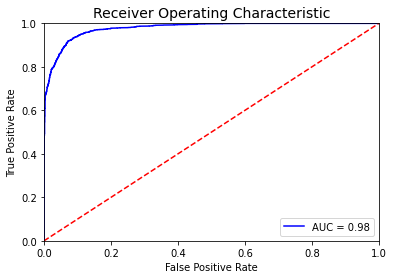

In [ ]:
# Calculate ROC AUC for the XGBoost Classifier
roc_value = roc_auc_score(y_test_b, xgb_final_prob)
print('The area under the ROC curve is:', round(roc_value, 2))

fpr, tpr, threshold = metrics.roc_curve(y_test_b, xgb_final_prob)
roc_auc = metrics.auc(fpr, tpr)

# Plotting ROC Curve
plt.rcParams['figure.figsize'] = (5, 4)
plt.title('Receiver Operating Characteristic', fontsize = 14)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
cm = confusion_matrix(y_test_b, xgb_final_pred)
cm
# TP, FP
# FN, TN

array([[1877,  158],
       [ 163, 1921]])

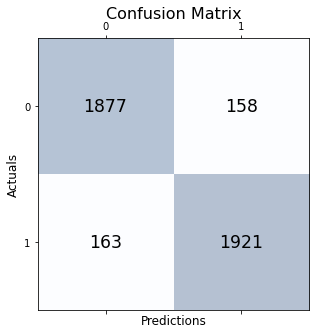

In [ ]:
# Visualise Confusion Matrix
fig, ax = plt.subplots(figsize = (5, 5))
ax.matshow(cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x = j, y = i, s = cm[i, j],
                va = 'center', ha = 'center', size = 'xx-large')

plt.xlabel('Predictions', fontsize = 12)
plt.ylabel('Actuals', fontsize = 12)
plt.title('Confusion Matrix', fontsize = 16)
plt.show()

#### CatBoost (Categorical Boosting)

##### Model Construction - CatBoost (Default Parameter)

In [ ]:
# Initialise CatBoost Model
catb = CatBoostClassifier()

# Fit CatBoost Classifier to Training Data
catb.fit(x_train_b, y_train_b)

# Make Prediction using Test Data and Model
catb_pred = catb.predict(x_test_b)
catb_prob = catb.predict_proba(x_test_b)[:, 1]

# Check Model's Accuracy
catb_test_acc = metrics.accuracy_score(y_test_b, catb_pred)
print('\n\033[1m'+"CatBoost Classifier Model Accuracy (%):"+'\033[0m', round(catb_test_acc *100, 2))

Learning rate set to 0.034081
0:	learn: 0.6622145	total: 59.1ms	remaining: 59.1s
1:	learn: 0.6314513	total: 68.2ms	remaining: 34.1s
2:	learn: 0.6038474	total: 77.5ms	remaining: 25.8s
3:	learn: 0.5764760	total: 86.8ms	remaining: 21.6s
4:	learn: 0.5498636	total: 96.1ms	remaining: 19.1s
5:	learn: 0.5256936	total: 105ms	remaining: 17.4s
6:	learn: 0.5046902	total: 115ms	remaining: 16.3s
7:	learn: 0.4863407	total: 124ms	remaining: 15.4s
8:	learn: 0.4739126	total: 133ms	remaining: 14.7s
9:	learn: 0.4597934	total: 142ms	remaining: 14.1s
10:	learn: 0.4456754	total: 152ms	remaining: 13.6s
11:	learn: 0.4307370	total: 171ms	remaining: 14.1s
12:	learn: 0.4183653	total: 191ms	remaining: 14.5s
13:	learn: 0.4085175	total: 203ms	remaining: 14.3s
14:	learn: 0.3960749	total: 212ms	remaining: 13.9s
15:	learn: 0.3850459	total: 223ms	remaining: 13.7s
16:	learn: 0.3746370	total: 232ms	remaining: 13.4s
17:	learn: 0.3653399	total: 243ms	remaining: 13.2s
18:	learn: 0.3580510	total: 253ms	remaining: 13s
19:	lear

##### Model Evaluation - CatBoost (Default Params)

Text(0.5, 0, 'CatBoost Feature Importance')

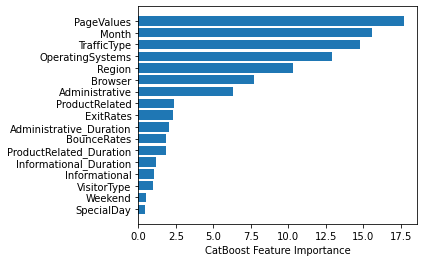

In [ ]:
# Sort the Values of Feature Importance in Descending Order
sorted_idx = catb.feature_importances_.argsort()

# Plot Horizontal Bar Plot to show CatBoost Feature Importance
plt.barh(data1.columns[sorted_idx], catb.feature_importances_[sorted_idx])
plt.xlabel("CatBoost Feature Importance")

The area under the ROC curve is: 0.98


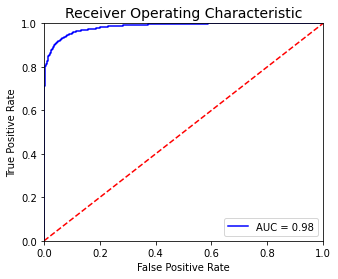

In [ ]:
# Calculate ROC AUC for the Random Forest Classifier
roc_value = roc_auc_score(y_test_b, catb_prob)
print('The area under the ROC curve is:', round(roc_value, 2))

fpr, tpr, threshold = metrics.roc_curve(y_test_b, catb_prob)
roc_auc = metrics.auc(fpr, tpr)

# Plotting ROC Curve
plt.rcParams['figure.figsize'] = (5, 4)
plt.title('Receiver Operating Characteristic', fontsize = 14)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
cm = confusion_matrix(y_test_b, catb_pred)
cm
# TP, FP
# FN, TN

array([[1905,  130],
       [ 149, 1935]])

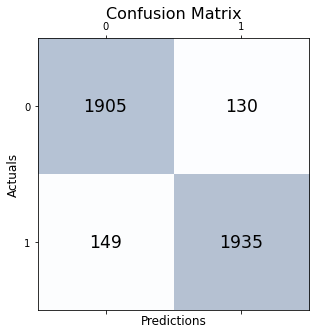

In [ ]:
# Visualise Confusion Matrix
fig, ax = plt.subplots(figsize = (5, 5))
ax.matshow(cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x = j, y = i, s = cm[i, j],
                va = 'center', ha = 'center', size = 'xx-large')

plt.xlabel('Predictions', fontsize = 12)
plt.ylabel('Actuals', fontsize = 12)
plt.title('Confusion Matrix', fontsize = 16)
plt.show()

##### Model Optimisation - CatBoost (HyperParams Tuning)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Initialise CatBoost Model
catb_pt = CatBoostClassifier(n_estimators = 2000, od_type = 'Iter', od_wait = 10)

# Define Parameters
parameters = dict() # dictionary
parameters['learning_rate'] = [0.001, 0.01]
parameters['max_depth'] = [4, 8, 10]
parameters['l2_leaf_reg'] = [2, 5, 10]
parameters['random_strength'] = [0, 5, 10]

# Perform RandomizedSeachCV
catb_random = RandomizedSearchCV(n_iter = 10, estimator = catb_pt, param_distributions = parameters,
                                 cv = 3, scoring = "accuracy", n_jobs = -1)

# Declare the Evaluation Data Set
eval_set = [(x_train_b, y_train_b),(x_test_b, y_test_b)]

# Fit CatBoost Classifier to Training Data
catb_random.fit(X = x_train_b, y = y_train_b, early_stopping_rounds = 10,
              use_best_model = True, eval_set = eval_set, verbose = 0)

# Show Result from Randomized Search
print("Results from Randomized Search for CatBoost Model" )
print("\n Best Estimator across ALL Searched Params:\n", catb_random.best_estimator_)
print("\n Best Parameters across ALL Searched Params:\n", catb_random.best_params_)
print("\n Best Score across ALL Searched Params:\n", catb_random.best_score_)

Results from Randomized Search for CatBoost Model

 Best Estimator across ALL Searched Params:

 Best Parameters across ALL Searched Params:
 {'random_strength': 5, 'max_depth': 10, 'learning_rate': 0.01, 'l2_leaf_reg': 10}

 Best Score across ALL Searched Params:
 0.9377845620737882


In [ ]:
# Define the Estimator for CatBoost Model
catb_final = catb_random.best_estimator_

# Make Prediction on Test Data
catb_final_pred = catb_final.predict(x_test_b)
catb_final_prob = catb_final.predict_proba(x_test_b)[:, 1]

# Check Model Accuracy
print('\033[1m'+"CatBoost Classifier with HyperParams Tuning \nModel Accuracy (%):"+'\033[0m',
      round(metrics.accuracy_score(y_test_b, catb_final_pred) *100, 2))

CatBoost Classifier with HyperParams Tuning 
Model Accuracy (%): 93.76


In [ ]:
# Calculate Accuracy of CatBoost Models
catb_train = catb.score(x_train_b, y_train_b)
catb_test = catb.score(x_test_b, y_test_b)
catb_final_train = catb_final.score(x_train_b, y_train_b)
catb_final_test = catb_final.score(x_test_b, y_test_b)

# Determine the Model is Good Fit, Underfit or Overfit
performance = {'Model':['Default CATB', 'CATB w/ HyperParamsTuning'],
               'Accuracy in Train':[catb_train, catb_final_train],
               'Accuracy in Test':[catb_test, catb_final_test]}

# Calling DataFrame constructor
overfitting = pd.DataFrame(performance)
print('\033[1m'+"CATBOOST MODEL COMPARISON for Overfitting Check"+'\033[0m\n')
print(overfitting)

CATBOOST MODEL COMPARISON for Overfitting Check

                       Model  Accuracy in Train  Accuracy in Test
0               Default CATB           0.972564          0.932265
1  CATB w/ HyperParamsTuning           0.978392          0.937606


In [ ]:
# Initialise CatBoost Model
catb_final = CatBoostClassifier(
    random_strength = 0, # (done)
    max_depth = 5, # (done)
    learning_rate = 0.1, # (done)
    l2_leaf_reg = 2, # (done)
    n_estimators = 90, # (done)
    od_type = 'Iter',
    od_wait = 10)

# Fit CatBoost Classifier to Training Data
catb_final.fit(x_train_b, y_train_b)

# Make Prediction using Test Data and Model
catb_final_pred = catb_final.predict(x_test_b)
catb_final_prob = catb_final.predict_proba(x_test_b)[:, 1]

# Check Model's Accuracy
catb_final_test_acc = (metrics.accuracy_score(y_test_b, catb_final_pred))
print('\n\033[1m'+"CatBoost Classifier Model Accuracy (%):"+'\033[0m', round(metrics.accuracy_score(y_test_b, catb_final_pred) *100, 2))

# Check Model's Parameter
print('\033[1m'+"CatBoost Classifier Paramter:"+'\033[0m')
catb_final.get_params()

0:	learn: 0.6312874	total: 19ms	remaining: 1.69s
1:	learn: 0.5819702	total: 33.9ms	remaining: 1.49s
2:	learn: 0.5402222	total: 40.9ms	remaining: 1.19s
3:	learn: 0.5057305	total: 47.2ms	remaining: 1.01s
4:	learn: 0.4749142	total: 54.5ms	remaining: 927ms
5:	learn: 0.4484711	total: 59.9ms	remaining: 838ms
6:	learn: 0.4267979	total: 66ms	remaining: 783ms
7:	learn: 0.4081872	total: 73.4ms	remaining: 752ms
8:	learn: 0.3917349	total: 78.7ms	remaining: 708ms
9:	learn: 0.3777420	total: 85.2ms	remaining: 682ms
10:	learn: 0.3653967	total: 92ms	remaining: 661ms
11:	learn: 0.3544924	total: 97.2ms	remaining: 632ms
12:	learn: 0.3436580	total: 104ms	remaining: 615ms
13:	learn: 0.3353028	total: 111ms	remaining: 602ms
14:	learn: 0.3258511	total: 126ms	remaining: 630ms
15:	learn: 0.3188919	total: 145ms	remaining: 672ms
16:	learn: 0.3125892	total: 155ms	remaining: 666ms
17:	learn: 0.3057978	total: 160ms	remaining: 642ms
18:	learn: 0.2998652	total: 167ms	remaining: 623ms
19:	learn: 0.2953063	total: 174ms	r

{'l2_leaf_reg': 2,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 90,
 'od_type': 'Iter',
 'od_wait': 10,
 'random_strength': 0}

##### Model Evaluation - CatBoost (HyperParams Tuning)

Text(0.5, 0, 'CatBoost Feature Importance')

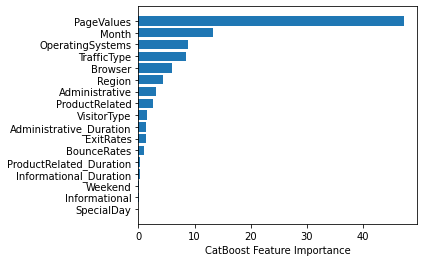

In [ ]:
# Sort the Values of Feature Importance in Descending Order
sorted_idx = catb_final.feature_importances_.argsort()

# Plot Horizontal Bar Plot to show CatBoost Feature Importance
plt.barh(data1.columns[sorted_idx], catb_final.feature_importances_[sorted_idx])
plt.xlabel("CatBoost Feature Importance")

The area under the ROC curve is: 0.98


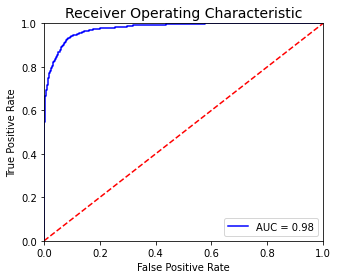

In [ ]:
# Calculate ROC AUC for the CatBoost Classifier
roc_value = roc_auc_score(y_test_b, catb_final_prob)
print('The area under the ROC curve is:', round(roc_value, 2))

fpr, tpr, threshold = metrics.roc_curve(y_test_b, catb_final_prob)
roc_auc = metrics.auc(fpr, tpr)

# Plotting ROC Curve
plt.rcParams['figure.figsize'] = (5, 4)
plt.title('Receiver Operating Characteristic', fontsize = 14)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
cm = confusion_matrix(y_test_b, catb_final_pred)
cm
# TP, FP
# FN, TN

array([[1875,  160],
       [ 162, 1922]])

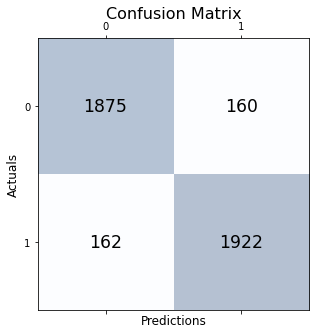

In [ ]:
# Visualise Confusion Matrix
fig, ax = plt.subplots(figsize = (5, 5))
ax.matshow(cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x = j, y = i, s = cm[i, j],
                va = 'center', ha = 'center', size = 'xx-large')

plt.xlabel('Predictions', fontsize = 12)
plt.ylabel('Actuals', fontsize = 12)
plt.title('Confusion Matrix', fontsize = 16)
plt.show()

#### Boosting Model Comparison / Selection

In [ ]:
# Calculate Accuracy of Boosting Models
xgb_train = xgb.score(x_train_b, y_train_b)
xgb_test = xgb.score(x_test_b, y_test_b)
catb_train = catb.score(x_train_b, y_train_b)
catb_test = catb.score(x_test_b, y_test_b)
xgb_final_train = xgb_final.score(x_train_b, y_train_b)
xgb_final_test = xgb_final.score(x_test_b, y_test_b)
catb_final_train = catb_final.score(x_train_b, y_train_b)
catb_final_test = catb_final.score(x_test_b, y_test_b)

# Compare Accuracy of the Models to Select the Best Model in Boosting
# Determine the Model is Good Fit, Underfit or Overfit
performance = {'Model':['Default XGB', 'Default CATB',
                        'XGB w/ HyperParamsTuning',
                        'CATB w/ HyperParamsTuning'],
               'Accuracy in Train':[xgb_train, catb_train, xgb_final_train, catb_final_train],
               'Accuracy in Test':[xgb_test, catb_test, xgb_final_test, catb_final_test]}

# Calling DataFrame Constructor
modelcomparison = pd.DataFrame(performance)
print('\033[1m'+"BOOSTING MODEL COMPARISON for Overfitting Check and Model Selection"+'\033[0m\n')
print(modelcomparison)

BOOSTING MODEL COMPARISON for Overfitting Check and Model Selection

                       Model  Accuracy in Train  Accuracy in Test
0                Default XGB           0.926616          0.922554
1               Default CATB           0.972868          0.933479
2   XGB w/ HyperParamsTuning           0.925706          0.922068
3  CATB w/ HyperParamsTuning           0.925159          0.921826


## Heterogeneous Ensemble

### Stacking

In [ ]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import StackingClassifier

### Base Models with Default Parameters

#### Model Construction - Default Parameters

In [ ]:
# Get a Stacking Ensemble of Models
def get_stacking():
    # Define Base Models
    base = list()
    base.append(('lr', LogisticRegression()))
    base.append(('knn', KNeighborsClassifier()))
    base.append(('etc', ExtraTreesClassifier()))    # Best Model in Bagging
    base.append(('catb', CatBoostClassifier()))     # Best Model in Boosting
    # Define Meta Learner Model
    meta = LogisticRegression()
    # Define Stacking Ensemble
    model = StackingClassifier(estimators = base, final_estimator = meta, cv = 5)
    return model

In [ ]:
# Get a List of Models to Evaluate
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['etc'] = ExtraTreesClassifier()
    models['catb'] = CatBoostClassifier()
    models['stacking'] = get_stacking()
    return models

In [ ]:
# Evaluate Given Models using Cross-Validation
def evaluate_model(model, x_train_b, y_train_b):
    cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 3, random_state = 1)
    scores = cross_val_score(model, x_train_b, y_train_b,
                             scoring = 'accuracy', cv = cv, n_jobs = -1,
                             error_score = 'raise')
    return scores

In [ ]:
# Get Models to Evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, x_train_b, y_train_b)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>lr 0.850 (0.005)
>knn 0.887 (0.006)
>etc 0.940 (0.004)
>catb 0.939 (0.002)
>stacking 0.959 (0.002)


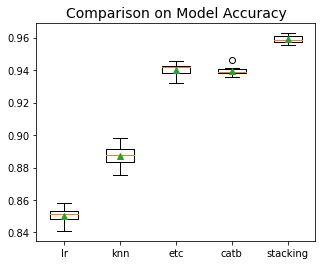

In [ ]:
# Compare Model Accuracy via Box-and-Whisker Plot
import matplotlib.pyplot as plt
# plot model performance for comparison
plt.title('Comparison on Model Accuracy', fontsize = 14)
plt.boxplot(results, labels = names, showmeans = True)
plt.show()

Based on the box-and-whisker plot, the accuracy of stacking model is the highest among all the models. Therefore, the stacking ensemble model is selected to be build on the training data.

In [ ]:
# Define Base Learner Models
base = list()
base.append(('lr', LogisticRegression()))
base.append(('knn', KNeighborsClassifier()))
base.append(('etc', ExtraTreesClassifier()))    # Best Model in Bagging
base.append(('catb', CatBoostClassifier()))     # Best Model in Boosting

# Define Meta Learner Model
meta = LogisticRegression()

# Initiate and Define Stacking Ensemble Model
stack_model = StackingClassifier(estimators = base, final_estimator = meta,
                                 cv = 5, n_jobs = -1)

# Fit the Model to Training Data
stack_model.fit(x_train_b, y_train_b)

# Make a Prediction on Testing Data
stack_model_pred = stack_model.predict(x_test_b)
stack_model_prob = stack_model.predict_proba(x_test_b)[:, 1]

# Check Model's Accuracy
stack_test_acc = metrics.accuracy_score(y_test_b, stack_model_pred)
print('\033[1m'+"Stacking Model on Base Models with Default Params"+'\033[0m')
print('Stacking Model Accuracy (%):', round(stack_test_acc *100, 2))

Stacking Model on Base Models with Default Params
Stacking Model Accuracy (%): 96.04


#### Model Evaluation - Default Parameters

The area under the ROC curve is: 0.99


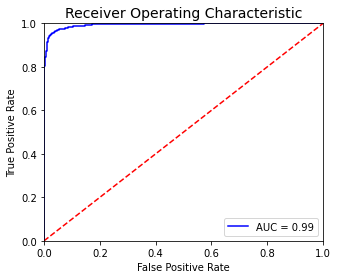

In [ ]:
# Calculate ROC AUC for the Stacking Model
roc_value = roc_auc_score(y_test_b, stack_model_prob)
print('The area under the ROC curve is:', round(roc_value, 2))

fpr, tpr, threshold = metrics.roc_curve(y_test_b, stack_model_prob)
roc_auc = metrics.auc(fpr, tpr)

# Plotting ROC Curve
plt.rcParams['figure.figsize'] = (5, 4)
plt.title('Receiver Operating Characteristic', fontsize = 14)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
cm = confusion_matrix(y_test_b, stack_model_pred)
cm
# TN, FN
# FP, TP

array([[1940,   95],
       [  68, 2016]])

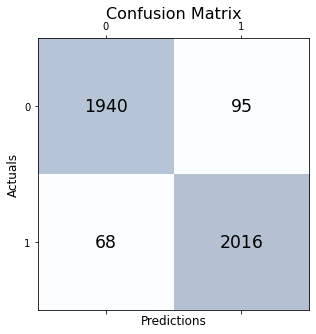

In [ ]:
# Visualise Confusion Matrix
fig, ax = plt.subplots(figsize = (5, 5))
ax.matshow(cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x = j, y = i, s = cm[i, j],
                va = 'center', ha = 'center', size = 'xx-large')

plt.xlabel('Predictions', fontsize = 12)
plt.ylabel('Actuals', fontsize = 12)
plt.title('Confusion Matrix', fontsize = 16)
plt.show()

### Base Models with Hyperparameter Tuning

#### Base Learner with Hyperparameter Tuning

#####  LogisticRegression with Hyperparameter Tuning

In [ ]:
# Fit Logistic Regression Classifier to Training Data
lr = LogisticRegression()
lr.fit(x_train_b, y_train_b)

# Make Prediction on Test Data
lr_pred = lr.predict(x_test_b)
lr_prob = lr.predict_proba(x_test_b)[:, 1]

# Check Model's Accuracy
lr_test_acc = metrics.accuracy_score(y_test_b, lr_pred)
print('Logistic Regression Classifier Model Accuracy (%):', round(lr_test_acc *100, 2))

# Check Model's Parameter
print('Logistic Regression Classifier Parameters:')
lr.get_params()

Logistic Regression Classifier Model Accuracy (%): 84.51
Logistic Regression Classifier Parameters:


{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
from sklearn.model_selection import GridSearchCV
from numpy import arange

# Initialise LogisticRegression Model
lr_pt = LogisticRegression()

# Define Parameters
parameters = dict() # dictionary
parameters['random_state'] = arange(0, 10, 1)
parameters['C'] = arange(0.0001, 10, 10)
parameters['solver'] = ['newton-cg', 'lbfgs', 'libliner', 'saga']
parameters['penalty'] = [ 'l1', 'l2', 'elasticnet', 'none']
parameters['max_iter'] = [10, 50, 100]

# Perform GridSeachCV
lr_grid = GridSearchCV(estimator = lr_pt, param_grid = parameters,
                       scoring = 'accuracy', cv = 3, n_jobs = -1, verbose = 2)

# Fit LogisticRegression Classifier to Training Data
lr_grid.fit(x_train_b, y_train_b)

# Show Result from Grid Search
print("Results from Grid Search for LR Model" )
print("\n Best Estimator across ALL Searched Params:\n", lr_grid.best_estimator_)
print("\n Best Parameters across ALL Searched Params:\n", lr_grid.best_params_)
print("\n Best Score across ALL Searched Params:\n", lr_grid.best_score_)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits
Results from Grid Search for LR Model

 Best Estimator across ALL Searched Params:
 LogisticRegression(C=0.0001, max_iter=10, penalty='none', random_state=0,
                   solver='saga')

 Best Parameters across ALL Searched Params:
 {'C': 0.0001, 'max_iter': 10, 'penalty': 'none', 'random_state': 0, 'solver': 'saga'}

 Best Score across ALL Searched Params:
 0.8491044561254067


In [ ]:
# Define the Estimator for LogisticRegression Model
lr_final = lr_grid.best_estimator_

# Make Prediction on Test Data
lr_final_pred = lr_final.predict(x_test_b)
lr_final_prob = lr_final.predict_proba(x_test_b)[:, 1]

# Check Model Accuracy
print('\033[1m'+"Logistic Regression Classifier with HyperParams Tuning \nModel Accuracy (%):"+'\033[0m',
      round(metrics.accuracy_score(y_test_b, lr_final_pred) *100, 2))

Logistic Regression Classifier with HyperParams Tuning 
Model Accuracy (%): 84.66


In [ ]:
# Determine the Model is Good Fit, Underfit or Overfit
lr_train = lr.score(x_train_b, y_train_b)
lr_test = lr.score(x_test_b, y_test_b)
lr_final_train = lr_final.score(x_train_b, y_train_b)
lr_final_test = lr_final.score(x_test_b, y_test_b)

fitting = {'Model':['Default LR', 'LR w/ HyperParamsTuning'],
           'Accuracy in Train':[lr_train, lr_final_train],
           'Accuracy in Test':[lr_test, lr_final_test]}

# Calling DataFrame constructor
performance = pd.DataFrame(fitting)
print('\033[1m'+"LOGISTIC REGRESSION MODEL COMPARISON for Overfitting Check"+'\033[0m\n')
print(performance)

LOGISTIC REGRESSION MODEL COMPARISON for Overfitting Check

                     Model  Accuracy in Train  Accuracy in Test
0               Default LR           0.848498          0.845108
1  LR w/ HyperParamsTuning           0.848619          0.846565


##### KNeighborsClassifier with Hyperparameter Tuning

In [ ]:
# Fit KNeighbors Classifier to Training Data
knn = KNeighborsClassifier()
knn.fit(x_train_b, y_train_b)

# Make Prediction on Test Data
knn_pred = knn.predict(x_test_b)
knn_prob = knn.predict_proba(x_test_b)[:, 1]

# Check Model's Accuracy
knn_test_acc = metrics.accuracy_score(y_test_b, knn_pred)
print('KNeighbors Classifier Model Accuracy (%):', round(knn_test_acc *100, 2))

KNeighbors Classifier Model Accuracy (%): 89.03


In [ ]:
from sklearn.model_selection import GridSearchCV
from numpy import arange

# Initialise KNeighbors Model
knn_pt = KNeighborsClassifier(leaf_size = 1, n_neighbors =  30)

# Define Parameters
parameters = dict() # dictionary
parameters['metric'] = ['euclidean', 'manhattan', 'minkowski']
parameters['weights'] = ['uniform', 'distance']
parameters['p'] = [1, 2]

# Perform GridSeachCV
knn_grid = GridSearchCV(estimator = knn_pt, param_grid = parameters,
                          scoring = 'accuracy', cv = 3, n_jobs = -1)

# Fit KNeighbors Classifier to Training Data
knn_grid.fit(x_train_b, y_train_b)

# Show Result from Grid Search
print("Results from Grid Search for KNN Model" )
print("\n Best Estimator across ALL Searched Params:\n", knn_grid.best_estimator_)
print("\n Best Parameters across ALL Searched Params:\n", knn_grid.best_params_)
print("\n Best Score across ALL Searched Params:\n", knn_grid.best_score_)

Results from Grid Search for KNN Model

 Best Estimator across ALL Searched Params:
 KNeighborsClassifier(leaf_size=1, metric='manhattan', n_neighbors=30, p=1,
                     weights='distance')

 Best Parameters across ALL Searched Params:
 {'metric': 'manhattan', 'p': 1, 'weights': 'distance'}

 Best Score across ALL Searched Params:
 0.8835202931332292


In [ ]:
# Define the Estimator for KNeighbors Model
knn_final = knn_grid.best_estimator_

# Make Prediction on Test Data
knn_final_pred = knn_final.predict(x_test_b)
knn_final_prob = knn_final.predict_proba(x_test_b)[:, 1]

# Check Model Accuracy
print('\033[1m'+"KNeighbors Classifier with HyperParams Tuning \nModel Accuracy (%):"+'\033[0m',
      round(metrics.accuracy_score(y_test_b, knn_final_pred) *100, 2))

KNeighbors Classifier with HyperParams Tuning 
Model Accuracy (%): 88.76


In [ ]:
# Determine the Model is Good Fit, Underfit or Overfit
knn_train = knn.score(x_train_b, y_train_b)
knn_test = knn.score(x_test_b, y_test_b)
knn_final_train = knn_final.score(x_train_b, y_train_b)
knn_final_test = knn_final.score(x_test_b, y_test_b)

fitting = {'Model':['Default KNN','KNN w/ Automate HyperParamsTuning'],
           'Accuracy in Train':[knn_train, knn_final_train],
           'Accuracy in Test':[knn_test, knn_final_test]}

# Calling DataFrame constructor
performance = pd.DataFrame(fitting)
print('\033[1m'+"KNEIGHBORS MODEL COMPARISON for Overfitting Check"+'\033[0m\n')
print(performance)

KNEIGHBORS MODEL COMPARISON for Overfitting Check

                               Model  Accuracy in Train  Accuracy in Test
0                        Default KNN           0.924734          0.890265
1  KNN w/ Automate HyperParamsTuning           1.000000          0.887594


In [ ]:
# Initialise KNeighbors Model
knn_final = KNeighborsClassifier(n_neighbors =  30,
                                 leaf_size = 1,
                                 weights = 'uniform',
                                 metric = 'manhattan',
                                 p = 1)

# Fit KNeighbors Classifier to Training Data
knn_final.fit(x_train_b, y_train_b)

# Make Prediction on Test Data
knn_final_pred = knn_final.predict(x_test_b)
knn_final_prob = knn_final.predict_proba(x_test_b)[:, 1]

# Check Model's Accuracy
knn_final_test_acc = metrics.accuracy_score(y_test_b, knn_final_pred)
print('KNeighbors Classifier Model Accuracy (%):', round(knn_final_test_acc *100, 2))

# Check Model's Parameter
print('KNeighbors Classifier Parameters:')
knn_final.get_params()

KNeighbors Classifier Model Accuracy (%): 86.38
KNeighbors Classifier Parameters:


{'algorithm': 'auto',
 'leaf_size': 1,
 'metric': 'manhattan',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 30,
 'p': 1,
 'weights': 'uniform'}

In [ ]:
# Determine the Model is Good Fit, Underfit or Overfit
knn_train = knn.score(x_train_b, y_train_b)
knn_test = knn.score(x_test_b, y_test_b)
knn_final_train = knn_final.score(x_train_b, y_train_b)
knn_final_test = knn_final.score(x_test_b, y_test_b)

fitting = {'Model':['Default KNN','KNN w/ Manual HyperParamsTuning'],
           'Accuracy in Train':[knn_train, knn_final_train],
           'Accuracy in Test':[knn_test, knn_final_test]}

# Calling DataFrame constructor
performance = pd.DataFrame(fitting)
print('\033[1m'+"KNEIGHBORS MODEL COMPARISON for Overfitting Check"+'\033[0m\n')
print(performance)

KNEIGHBORS MODEL COMPARISON for Overfitting Check

                             Model  Accuracy in Train  Accuracy in Test
0                      Default KNN           0.924734          0.890265
1  KNN w/ Manual HyperParamsTuning           0.878543          0.863802


#### Model Construction - Hyperparameter Tuning

In [ ]:
# Get a Stacking Ensemble of Models
def get_stacking():
    # Define Base Models
    level0 = list()
    level0.append(('lr', LogisticRegression(C = 0.0001, max_iter = 10, penalty = 'none', random_state = 4, solver = 'saga')))
    level0.append(('knn', KNeighborsClassifier(n_neighbors =  30, leaf_size = 1, weights = 'uniform', metric = 'manhattan', p = 1)))
    level0.append(('etc', ExtraTreesClassifier(bootstrap = True, max_depth = 9, max_features = 17,
                                               min_samples_leaf = 9, n_estimators = 3000, random_state = 2, n_jobs  = -1)))
    level0.append(('catb', CatBoostClassifier(random_strength = 0, max_depth = 5, learning_rate = 0.1, l2_leaf_reg = 2,
                                              n_estimators = 90, od_type = 'Iter', od_wait = 10)))
    # Define Meta Learner Model
    level1 = LogisticRegression()
    # Define Stacking Ensemble
    model = StackingClassifier(estimators = level0, final_estimator = level1, cv = 5)
    return model

In [ ]:
# Get a List of Models to Evaluate
def get_models():
    models = dict()
    models['lr'] = LogisticRegression(C = 0.0001, max_iter = 10, penalty = 'none', random_state = 4, solver = 'saga')
    models['knn'] = KNeighborsClassifier(n_neighbors =  30, leaf_size = 1, weights = 'uniform', metric = 'manhattan', p = 1)
    models['etc'] = ExtraTreesClassifier(bootstrap = True, max_depth = 9, max_features = 17, min_samples_leaf = 9,
                                         n_estimators = 3000, random_state = 2, n_jobs  = -1)
    models['catb'] = CatBoostClassifier(random_strength = 0, max_depth = 5, learning_rate = 0.1, l2_leaf_reg = 2,
                                        n_estimators = 90, od_type = 'Iter', od_wait = 10)
    models['stacking'] = get_stacking()
    return models

In [ ]:
# Evaluate Given Models using Cross-Validation
def evaluate_model(model, x_train_b, y_train_b):
    cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 3, random_state = 1)
    scores = cross_val_score(model, x_train_b, y_train_b,
                             scoring = 'accuracy', cv = cv, n_jobs = -1,
                             error_score = 'raise')
    return scores

In [ ]:
# Get Models to Evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, x_train_b, y_train_b)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>lr 0.850 (0.005)
>knn 0.859 (0.006)
>etc 0.885 (0.005)
>catb 0.923 (0.004)
>stacking 0.927 (0.004)


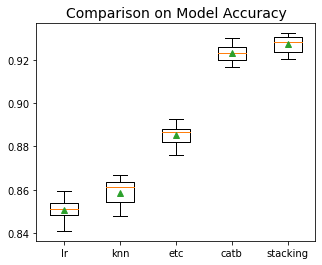

In [ ]:
# Compare Model Accuracy via Box-and-Whisker Plot
import matplotlib.pyplot as plt
# plot model performance for comparison
plt.title('Comparison on Model Accuracy', fontsize = 14)
plt.boxplot(results, labels = names, showmeans = True)
plt.show()

In [ ]:
# Define Base Learner Models
level0 = list()
level0.append(('lr', LogisticRegression(C = 0.0001, max_iter = 10, penalty = 'none', random_state = 4, solver = 'saga')))
level0.append(('knn', KNeighborsClassifier(n_neighbors =  30, leaf_size = 1, weights = 'uniform', metric = 'manhattan', p = 1)))
level0.append(('etc', ExtraTreesClassifier(bootstrap = True, max_depth = 9, max_features = 17, min_samples_leaf = 9,
                                           n_estimators = 3000, random_state = 2, n_jobs  = -1)))
level0.append(('catb', CatBoostClassifier(random_strength = 0, max_depth = 5, learning_rate = 0.1, l2_leaf_reg = 2,
                                          n_estimators = 90, od_type = 'Iter', od_wait = 10)))

# Define Meta Learner Model
level1 = LogisticRegression()

# Initiate and Define Stacking Ensemble Model
stacking = StackingClassifier(estimators = level0, final_estimator = level1, cv = 5)

# Fit the Model to Training Data
stacking.fit(x_train_b, y_train_b)

# Make a Prediction on Testing Data
stacking_pred = stacking.predict(x_test_b)
stacking_prob = stacking.predict_proba(x_test_b)[:, 1]

# Check Model's Accuracy
stacking_test_acc = metrics.accuracy_score(y_test_b, stacking_pred)
print('\n\033[1m'+"Stacking Model on Base Models with HyperParams Tuning"+'\033[0m')
print('Stacking Model Accuracy (%):', round(stacking_test_acc *100, 2))

0:	learn: 0.6303129	total: 54.6ms	remaining: 4.86s
1:	learn: 0.5806880	total: 61ms	remaining: 2.68s
2:	learn: 0.5382730	total: 66.4ms	remaining: 1.93s
3:	learn: 0.5033774	total: 71.8ms	remaining: 1.54s
4:	learn: 0.4730735	total: 77.4ms	remaining: 1.31s
5:	learn: 0.4461044	total: 83.3ms	remaining: 1.17s
6:	learn: 0.4240189	total: 89.6ms	remaining: 1.06s
7:	learn: 0.4052368	total: 95.2ms	remaining: 976ms
8:	learn: 0.3875259	total: 101ms	remaining: 908ms
9:	learn: 0.3732616	total: 107ms	remaining: 852ms
10:	learn: 0.3607911	total: 112ms	remaining: 805ms
11:	learn: 0.3497522	total: 118ms	remaining: 768ms
12:	learn: 0.3398406	total: 124ms	remaining: 734ms
13:	learn: 0.3295526	total: 129ms	remaining: 702ms
14:	learn: 0.3220137	total: 135ms	remaining: 674ms
15:	learn: 0.3150778	total: 141ms	remaining: 654ms
16:	learn: 0.3074745	total: 148ms	remaining: 634ms
17:	learn: 0.3007550	total: 153ms	remaining: 613ms
18:	learn: 0.2954934	total: 159ms	remaining: 595ms
19:	learn: 0.2910675	total: 165ms	r

#### Model Evaluation - Hyperparameter Tuning

The area under the ROC curve is: 0.98


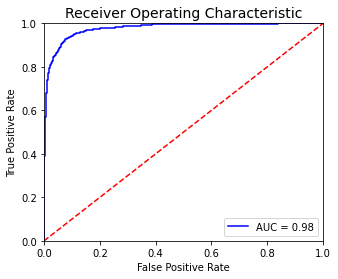

In [ ]:
# Calculate ROC AUC for the Stacking Model
roc_value = roc_auc_score(y_test_b, stacking_prob)
print('The area under the ROC curve is:', round(roc_value, 2))

fpr, tpr, threshold = metrics.roc_curve(y_test_b, stacking_prob)
roc_auc = metrics.auc(fpr, tpr)

# Plotting ROC Curve
plt.rcParams['figure.figsize'] = (5, 4)
plt.title('Receiver Operating Characteristic', fontsize = 14)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
cm = confusion_matrix(y_test_b, stacking_pred)
cm
# TN, FN
# FP, TP

array([[1879,  156],
       [ 148, 1936]])

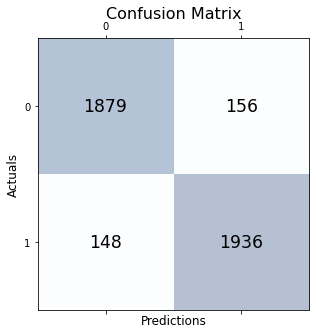

In [ ]:
# Visualise Confusion Matrix
fig, ax = plt.subplots(figsize = (5, 5))
ax.matshow(cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x = j, y = i, s = cm[i, j],
                va = 'center', ha = 'center', size = 'xx-large')

plt.xlabel('Predictions', fontsize = 12)
plt.ylabel('Actuals', fontsize = 12)
plt.title('Confusion Matrix', fontsize = 16)
plt.show()

### Stacking Model Comparison / Selection

In [ ]:
# Calculate Accuracy of Stacking Models
stack_train = stack_model.score(x_train_b, y_train_b)
stack_test = stack_model.score(x_test_b, y_test_b)
stacking_train = stacking.score(x_train_b, y_train_b)
stacking_test = stacking.score(x_test_b, y_test_b)

performance = {'Stacking Model':['Base Model w/ Default Params',
                                 'Base Model w/ HyperParams Tuning'],
               'Accuracy in Test':[stack_train, stacking_train],
               'Accuracy in Train':[stack_test, stacking_test]}

# Calling DataFrame Constructor
modelcomparison = pd.DataFrame(performance)
print('\033[1m'+"STACKING MODEL COMPARISON for Overfitting Check and Model Selection"+'\033[0m\n')
print(modelcomparison)

STACKING MODEL COMPARISON for Overfitting Check and Model Selection

                     Stacking Model  Accuracy in Test  Accuracy in Train
0      Base Model w/ Default Params          1.000000           0.960427
1  Base Model w/ HyperParams Tuning          0.932564           0.926196
